# <center>Maternal Health Risk Analysis 

## <center>Introduction

Maternal health risk analysis seeks to identify and comprehend the variables that raise health risks for expectant mothers and new mothers. Finding trends, correlations, and possible predictors linked to maternal health risks is the main objective. The purpose of this analysis is to offer insights that will help improve prenatal care, strengthen maternal healthcare strategies, and ultimately lower the health risks associated with pregnancy.  the goal is to contribute to advancements in healthcare practices, improve the overall well-being of pregnant individuals, and promote healthier outcomes for both mothers and newborns.

# Data Attributes

1. Age: Represents the age of a woman when she is pregnant, measured in years.
2. SystolicBP: Denotes the upper value of blood pressure in millimeters of mercury (mmHg), a significant attribute during pregnancy.
3. DiastolicBP: Represents the lower value of blood pressure in millimeters of mercury (mmHg), another crucial attribute in maternal health monitoring.
4. BS: Indicates blood glucose levels measured in terms of molar concentration, specifically in millimoles per liter (mmol/L).
5. BodyTemp: Denotes the body temperature of the pregnant woman in Fahrenheit (°F), providing additional insights into the physiological aspects relevant to maternal health.
6. HeartRate: Represents the normal resting heart rate in beats per minute (bpm), a vital parameter for assessing cardiovascular health during pregnancy.
7. RiskLevel (Target Variable): Predicted Risk Intensity Level during pregnancy, taking into account the aforementioned health attributes. This variable serves as the target for our machine learning models.

### Import, install Libraries <br>

In [1]:
#pip install yellowbrick
#pip install streamlit
#pip install xgboost

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot
import yellowbrick
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import streamlit as st
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew, kurtosis

### Loading Dataset <br>

Pandas read_csv is used to import the data because the dataset file is a.csv file.

In [3]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head(-5)

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1004   13          90           65   9.0     101.0         80  high risk
1005   17          90           65   7.7     103.0         67  high risk
1006   17          85           60   6.3     102.0         86  high risk
1007   40         120           75   7.7      98.0         70  high risk
1008   48         120           80  11.0      98.0         88  high risk

[1009 rows x 7 columns]

Below is the confirmation that this is indeed a  dataset with 1,009 observations (rows) and 7 variables (columns). BS is Blood Sugar.

Data type all are numeric except RiskLevel (target)
Categorical Variable: Risk Level.
Numerical Variable: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.
Because we have categorical and numerical fetures,- it is recognised as classification problem. (Kumar, A. 2023)

### Data Exploration and Preprocessing <br> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


The following step gives you an idea of how the Pandas library currently recognizes the various variables. Four of the seven columns have integer types, two have float types, and one is object type. Further research is necessary because, as the above display indicates, all of these variables—aside from the target variable—should be floats or integers.
The file is 55+ MK in size, which is also large.

In [5]:
df.shape

(1014, 7)

### Investigating Duplicates
There seem to be duplicated data in this dataset.

Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. At worst, duplicate data can skew analysis results and threaten the integrity of the data set. Including them will essentially lead to the model overfitting this subset of points. But in this case, we will try to analyze this data first to understand the distribution of the data.

In [6]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [7]:
all_duplicated_rows = df[df.duplicated(keep=False)]
print(all_duplicated_rows)

      Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
1      35         140           90  13.00      98.0         70  high risk
2      29          90           70   8.00     100.0         80  high risk
3      30         140           85   7.00      98.0         70  high risk
4      35         120           60   6.10      98.0         76   low risk
5      23         140           80   7.01      98.0         70  high risk
...   ...         ...          ...    ...       ...        ...        ...
1009   22         120           60  15.00      98.0         80  high risk
1010   55         120           90  18.00      98.0         60  high risk
1011   35          85           60  19.00      98.0         86  high risk
1012   43         120           90  18.00      98.0         70  high risk
1013   32         120           65   6.00     101.0         76   mid risk

[866 rows x 7 columns]


In [8]:
df_dup = df.duplicated().any()
df_dup 

True

In [9]:
df_dup.sum()

1

We had 574 duplicates in the dataset, which is a significant amount of duplicates. However, in this instance, the patients may have the same value for certain health factors. We will attempt to analyse the data initially in order to comprehend the distribution of the data, since a woman may be 28 years old and another woman may be the same age.

In [10]:
df.shape

(1014, 7)

In [11]:
df.sample()

Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate RiskLevel
916   15          80           60  7.5      98.0         80  low risk

In [12]:
df.value_counts()

Age  SystolicBP  DiastolicBP  BS    BodyTemp  HeartRate  RiskLevel
19   120         80           7.0   98.0      70         mid risk     27
48   120         80           11.0  98.0      88         high risk    14
31   120         60           6.1   98.0      76         mid risk     13
40   160         100          19.0  98.0      77         high risk    10
55   140         95           19.0  98.0      77         high risk    10
                                                                      ..
25   120         90           6.9   98.0      70         low risk      1
                                              80         low risk      1
                              7.5   98.0      80         low risk      1
                 100          6.8   98.0      60         low risk      1
70   85          60           6.9   102.0     70         low risk      1
Name: count, Length: 452, dtype: int64

In [13]:
df["RiskLevel"].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [14]:
df.dtypes.value_counts()

int64      4
float64    2
object     1
Name: count, dtype: int64

In [15]:
df.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

Now that all the variables are the correct types, using .describe(), this will provide a quick overview of the standard statistical values of the data as well as the count, which will provide a rough view of the missingness of the data.

In [16]:
df.describe().T

count        mean        std   min    25%    50%    75%    max
Age          1014.0   29.871795  13.474386  10.0   19.0   26.0   39.0   70.0
SystolicBP   1014.0  113.198225  18.403913  70.0  100.0  120.0  120.0  160.0
DiastolicBP  1014.0   76.460552  13.885796  49.0   65.0   80.0   90.0  100.0
BS           1014.0    8.725986   3.293532   6.0    6.9    7.5    8.0   19.0
BodyTemp     1014.0   98.665089   1.371384  98.0   98.0   98.0   98.0  103.0
HeartRate    1014.0   74.301775   8.088702   7.0   70.0   76.0   80.0   90.0

df.describe().T shows dataset with differing physiological parameter levels among individuals is revealed by the summary statistics, offering a basis for investigating maternal health risks. Although there is some variation in blood pressure and blood sugar levels, body temperature is generally constant throughout the dataset. In order to improve prenatal care and maternal health outcomes, more analysis of these parameters in relation to maternal health risk levels can help develop targeted interventions and predictive models. (note.nkmk.me. (2024))

In [17]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

It has been determined that there are no instances of missing or null values in the dataset after it has been carefully inspected. Every observation in the dataset, regardless of the variables and features, has accurate and comprehensive information. The lack of missing values guarantees the accuracy and consistency of the data, laying a strong basis for further analysis and modeling projects.

In [18]:
total_data = df.size
zero_count = (df ==0).sum().sum()
percentage_zeros = (zero_count / total_data) * 100

print("Number of zeros in the DataFrame: ", zero_count)
print(f"Percentage of Zeros: {percentage_zeros:.2f}%")

Number of zeros in the DataFrame:  0
Percentage of Zeros: 0.00%


"A matrix is sparse if a high percentage of its elements are zero. “High”, of course, is a relative term, but if about 50% or more of the elements are zero the matrix may be considered sparse." (Branham, R. L. (1990)) Given that the initial exploration also identified zero values, a brief examination of the data's sparsity was conducted. Sparse data can result in overfitting in models and increase memory usage. However, since the sparsity level of this data is below the standard threshold, no additional data cleaning is necessary.

In [19]:
categorical_columns = df.select_dtypes(include='category').columns
print(categorical_columns)

Index([], dtype='object')


In [20]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

We are interested in determining the relationship between the numerical values in our data to see clearly correlation. (Stack Overflow. (n.d.)). 

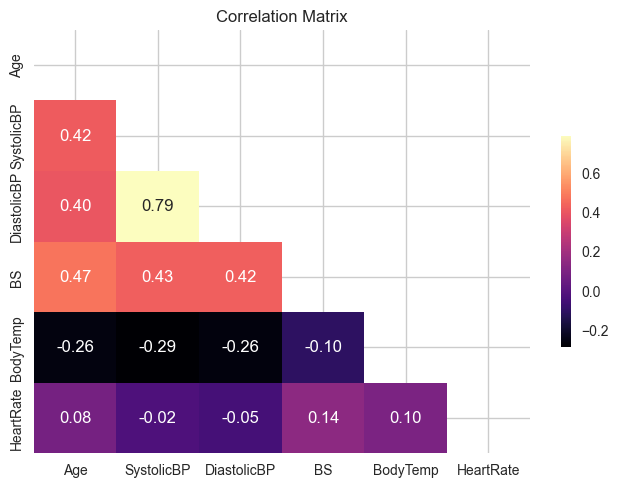

In [21]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, fmt=".2f", cmap='magma', cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()


Our matrix shows the most of correlation is concentrated  at Systolik Blood Preasure and Diastolik together with Blood Sugar. BP has effect on maternal admission to intensive care, stillbirth, neonatal death or preterm birth. They may have different effects on diagnosing and monitoring high BP, and reducing the Risk of serious illness or death in both woman and baby. (Ashworth et al., 2020)

Regular blood pressure (BP) measurement is crucial for the diagnosis and management of hypertensive disorders in pregnancy, such as pre‐eclampsia. (Bonnar, MacGillivray and Symonds, 2012)

RiskLevel       object dtype: object - Means it is our categorical value.

In [22]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [23]:
df['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [24]:
df['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [25]:
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [26]:
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [27]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [28]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [29]:
df.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

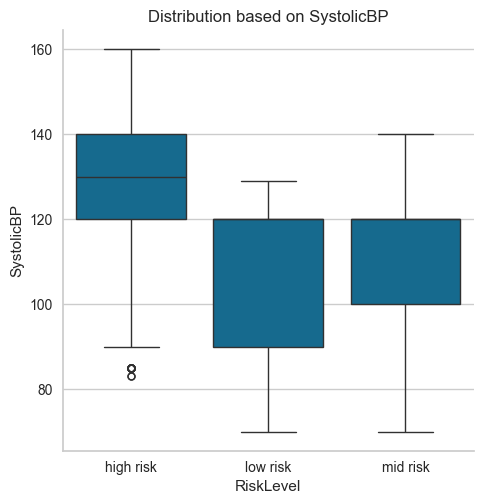

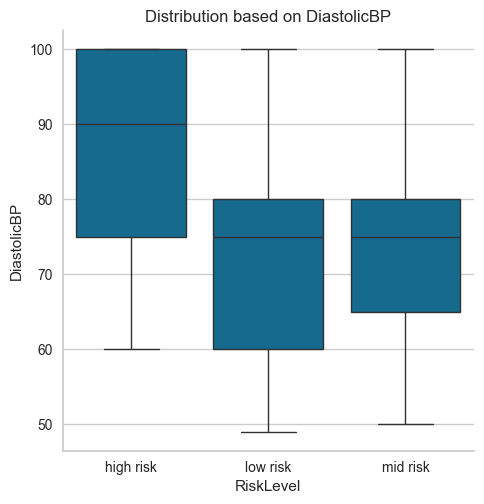

In [30]:
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")

In [31]:
numerical_stats = df.describe()
categorical_stats = df.describe(include='object')

print("Descriptive Statistics for Numerical Features:")
print(numerical_stats)

print("\nSummary Statistics for Categorical Features:")
print(categorical_stats)

Descriptive Statistics for Numerical Features:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  

Summary Statistics for Categorical Features:
       RiskLevel
count       1014
unique         3


# Descriptive Statistics

In [32]:
df_st = np.array(df["Age"])

In [33]:
mean = np.mean(df_st)

In [34]:
std_dev = np.std(df_st)
variance = np.var(df_st)
total_sum = np.sum(df_st)
skewness = skew(df_st)
kurt = kurtosis(df_st)
coef_variation = std_dev / mean
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Sum:", total_sum)
print("Skewness:", skewness)
print("Kurtosis:", kurt)
print("Coefficient of Variation:", coef_variation)

Mean: 29.871794871794872
Standard Deviation: 13.46773971939033
Variance: 181.38001314924392
Sum: 30290
Skewness: 0.7819046305972845
Kurtosis: -0.39539824451956385
Coefficient of Variation: 0.45085137258044883


The dataset's average systolic blood pressure is approximately 29.87 mmHg, with a moderate spread indicated by a standard deviation of 13.47 mmHg. Variability in the data is evidenced by a coefficient of variation of 0.45, while its skewness of 0.78 suggests a slight rightward skew in the distribution. Overall, the dataset represents systolic blood pressure measurements with moderate variability and a tendency towards higher values.

Data has a mean value of approximately 3.34 with a moderate standard deviation of around 0.43, indicating some variability around the mean. The distribution appears slightly skewed to the right (positive skewness) and has negative kurtosis, suggesting it is less peaked than a normal distribution. The coefficient of variation indicates that the variability relative to the mean is relatively low.

# Encoding categorical features <br>

Now will do mapping of Risk level.

In [35]:
risk_mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
}

In [36]:
df["RiskLevel"] = df["RiskLevel"].map(risk_mapping).fillna("RiskLevel").astype(int)
df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          2
1      35         140           90  13.0      98.0         70          2
2      29          90           70   8.0     100.0         80          2
3      30         140           85   7.0      98.0         70          2
4      35         120           60   6.1      98.0         76          0
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          2
1010   55         120           90  18.0      98.0         60          2
1011   35          85           60  19.0      98.0         86          2
1012   43         120           90  18.0      98.0         70          2
1013   32         120           65   6.0     101.0         76          1

[1014 rows x 7 columns]

Our visualisation from df_st visible Distribution of Maternal Health Risk is conciderably lower then df countlpot belove. 

In [37]:
df["RiskLevel"].value_counts()

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64

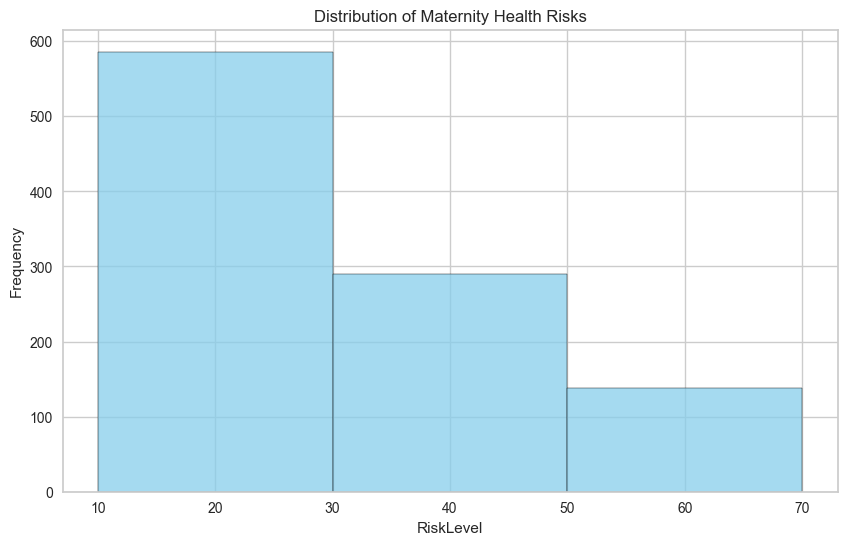

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_st, bins=3, kde=False, color='skyblue')
plt.title('Distribution of Maternity Health Risks')
plt.xlabel('RiskLevel')
plt.ylabel('Frequency')
plt.show()

In [39]:
df[['RiskLevel','Age']].corr()

RiskLevel       Age
RiskLevel   1.000000  0.267225
Age         0.267225  1.000000

In [40]:
df[['RiskLevel','SystolicBP']].corr()

RiskLevel  SystolicBP
RiskLevel    1.000000    0.396473
SystolicBP   0.396473    1.000000

In [41]:
df[['RiskLevel','BS']].corr()

RiskLevel        BS
RiskLevel   1.000000  0.569942
BS          0.569942  1.000000

In [42]:
df[['RiskLevel','HeartRate']].corr()

RiskLevel  HeartRate
RiskLevel   1.000000   0.194312
HeartRate   0.194312   1.000000

In [43]:
df[['RiskLevel','DiastolicBP']].corr()

RiskLevel  DiastolicBP
RiskLevel     1.000000     0.346649
DiastolicBP   0.346649     1.000000

In [44]:
df.describe().T.iloc[:, 1:].style.background_gradient('magma')

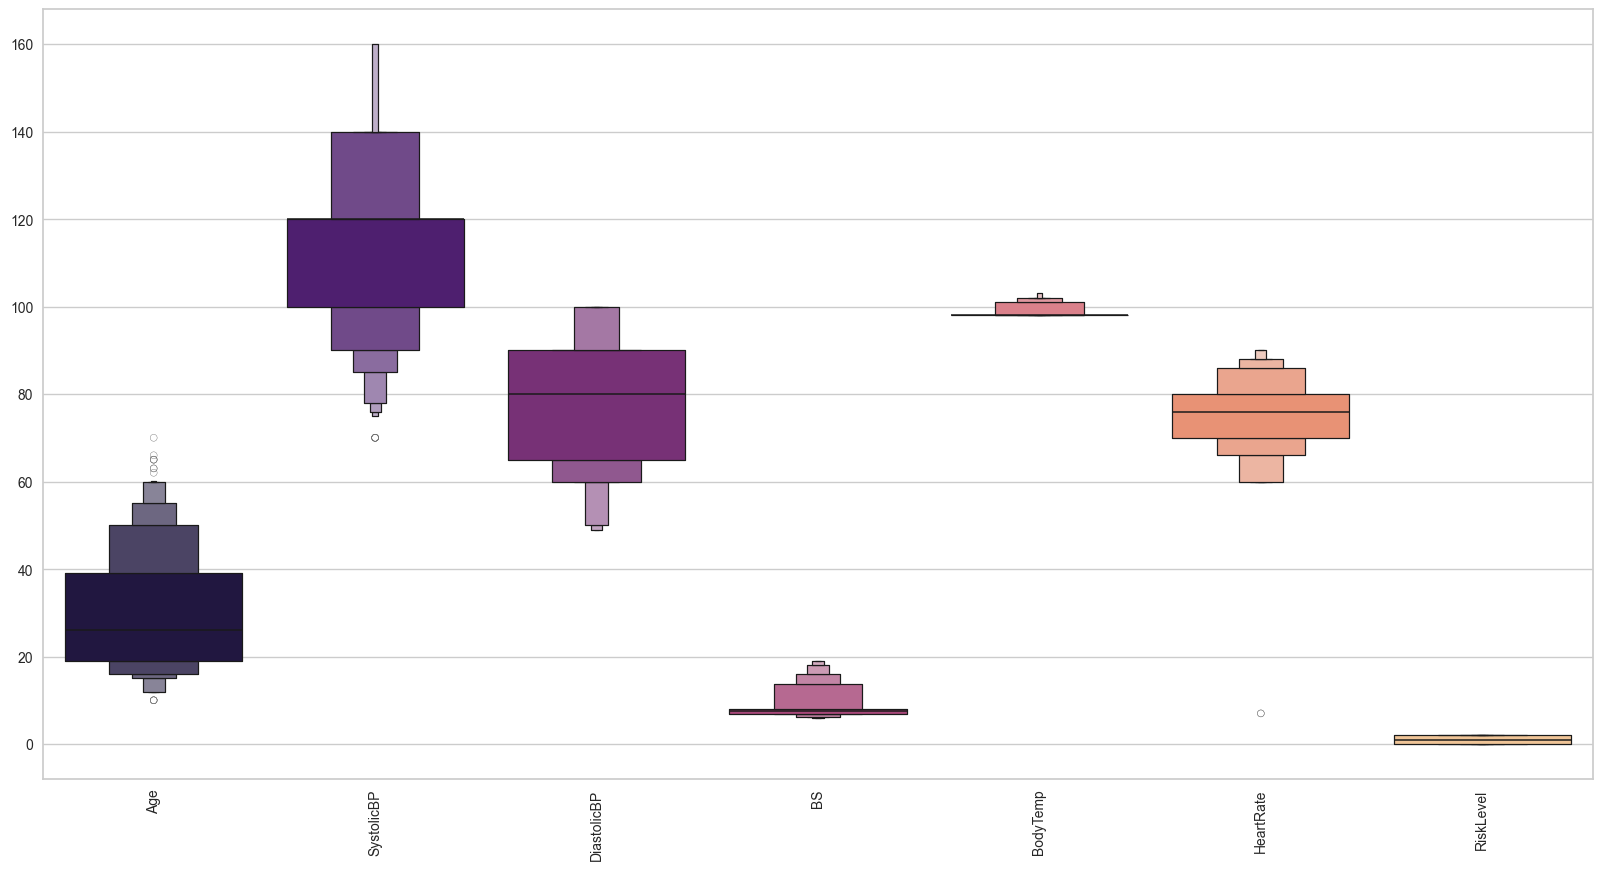

In [45]:
plt.figure(figsize=(20,10))
sns.boxenplot(df, palette='magma')
plt.xticks(rotation=90)
plt.show()

Only two variables exhibit a higher correlation: diastolic and systolic blood pressure (BP) with Body Temperature. Preeclampsia is a pregnancy complication that we can predict as a high risk at maternity risk levels based on symptoms and evidence found in our dataset. Pregnant mother may experience elevated blood pressure and high urine protein levels if she  has preeclampsia. Preeclampsia can cause major, potentially fatal complications for both the mother and the child if it is not treated. (HSE.ie, n.d.)

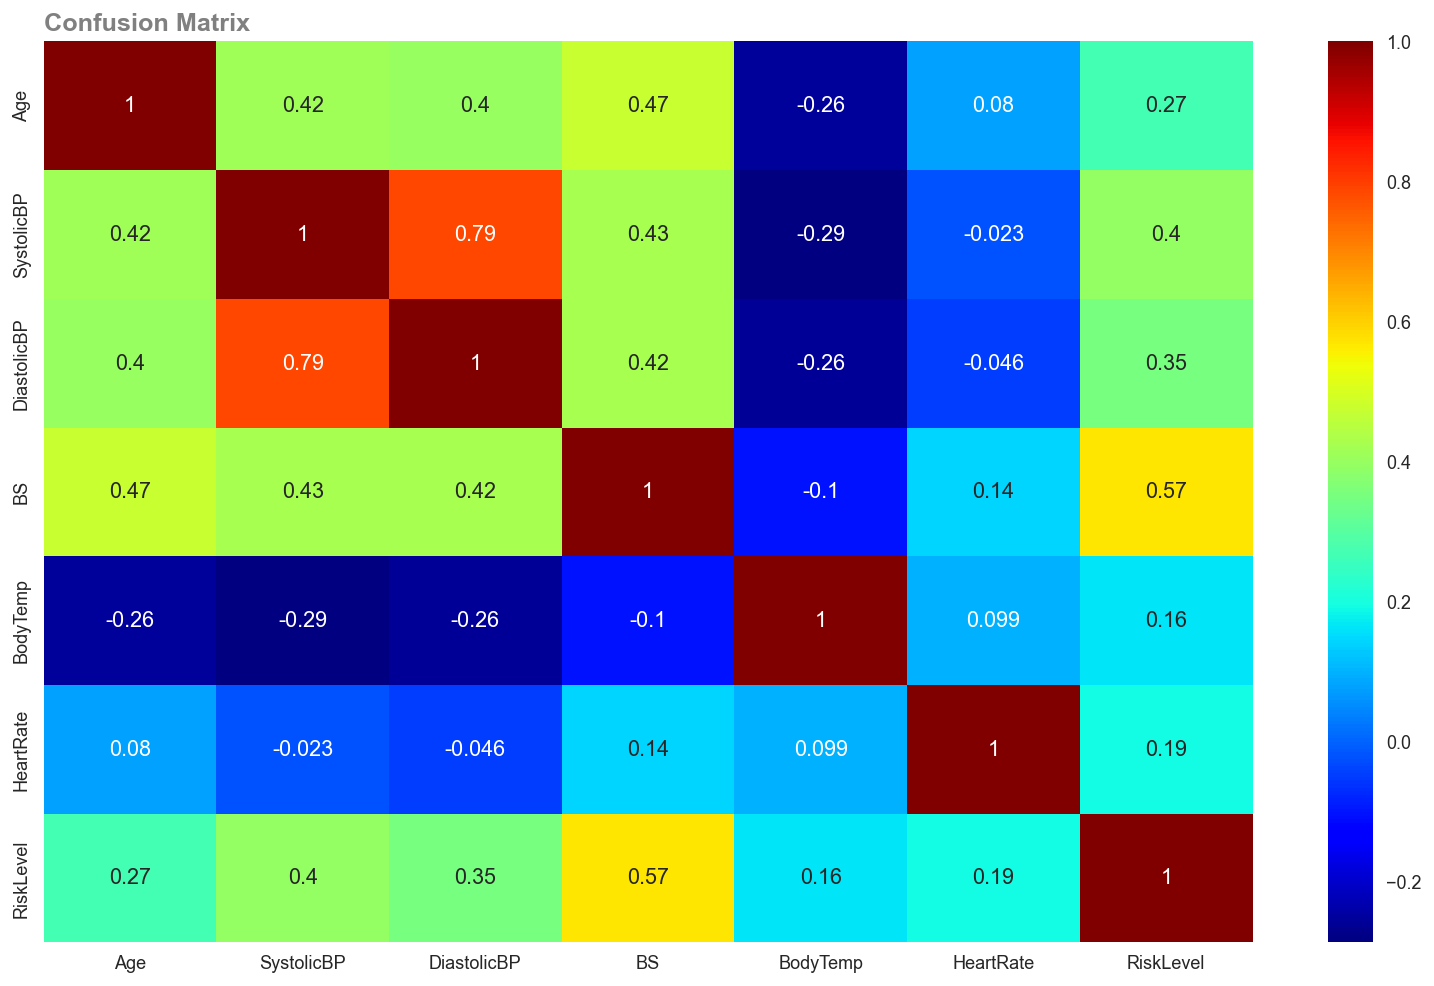

Text(0.5, 0.001, 'Figure 1_CA3')

<Figure size 800x550 with 0 Axes>

In [46]:
plt.figure(figsize=(15,9), dpi=130)
sns.heatmap(df.corr(), cmap="jet", annot=True)
plt.title('Confusion Matrix',fontsize=14,fontweight='bold', color='grey',loc='left')
plt.show()
plt.figtext(0.5,0.001,'Figure 1_CA3', ha='center', va='center',fontsize=16, fontweight='bold')

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. In this case, the high positive correlation between SystolicBP and DiastolicBP suggests that they contain redundant or overlapping information regarding blood pressure.  One approach is to consider removing one of the highly correlated variables from the model if they are providing redundant information. Alternatively, techniques such as principal component analysis (PCA) will mitigate the effects of multicollinearity in our dataset.  (Zach, 2019)
Despite that fact that we retained duplicates in comparison to our JN file CA2.
The notable correlation observed primarily lies between Systolic and Diastolic Blood Pressure (BP). This relationship extends to age an BS (blood sugar), a factor that can significantly impact maternity conditions, birth outcomes, and overall child health.


Text(0.5, 0.001, 'Maternal Health Risk')

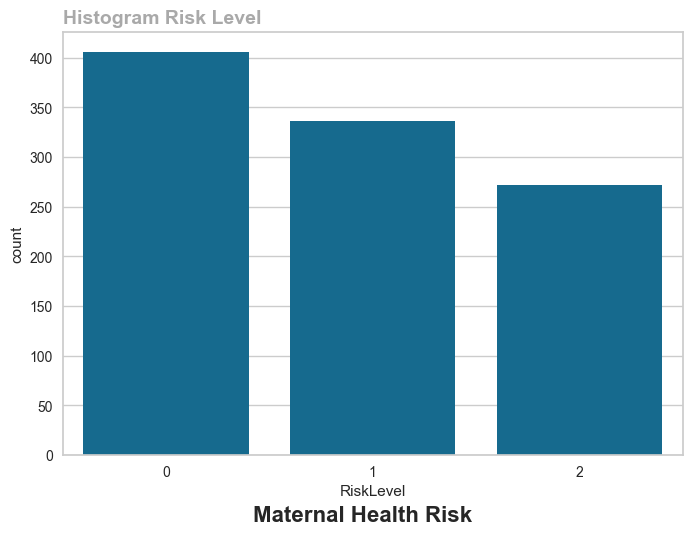

In [47]:
sns.countplot(df, x="RiskLevel")
plt.title('Histogram Risk Level',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.figtext(0.5,0.001,'Maternal Health Risk', ha='center', va='center',fontsize=16, fontweight='bold')

Evaluating the target variable's balance entails a detailed analysis of the class distribution within the chosen outcome variable. A balanced dataset has a proportionate representation of instances across all classes because each class or category within the target variable shows a relatively equal frequency. In order to ensure fair and accurate predictions for all classes, this equilibrium is essential because it keeps the model from being biased toward predicting the majority class. However, an unbalanced dataset could have a significant difference in the number of occurrences between various classes, making it difficult for the model to identify and extrapolate patterns for minority classes. Class distributions can be visualized using histograms, bar charts, or class frequency calculations to assess balance. In situations where class imbalances could affect the model's performance, like in classification tasks with rare events or minority classes, it is especially crucial to make sure the distribution is balanced.

In [48]:
value_counts_result = df['RiskLevel' ].value_counts()

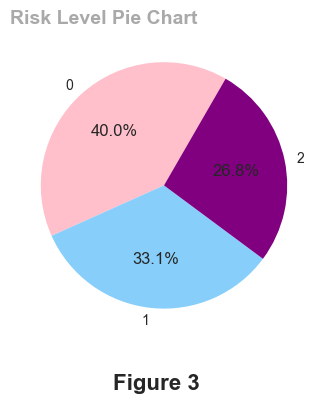

In [49]:
plt.figure(figsize=(6, 4))
plt.pie(value_counts_result, labels=value_counts_result.index, autopct='%1.1f%%', startangle=60, colors=['pink', 'lightskyblue', 'purple'])
plt.title('Risk Level Pie Chart',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.figtext(0.5,0.001,'Figure 3', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

0 - Low Risk is updated now to 40.0% from 51.8%, 1 - medium risk is 33.1% compared to 23.5% and 2 - high risk is 26.8% new while 24.8% after removing duplicates.

In [50]:
df.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.301775     0.867850  
std       8.088702     0.807353  
min       7.000000     0.000000  
25%      70.000000     0.000000  
50%      76.000000     1.000000  
75%      80.000000     2.000000  
max      90.000000     2.000000

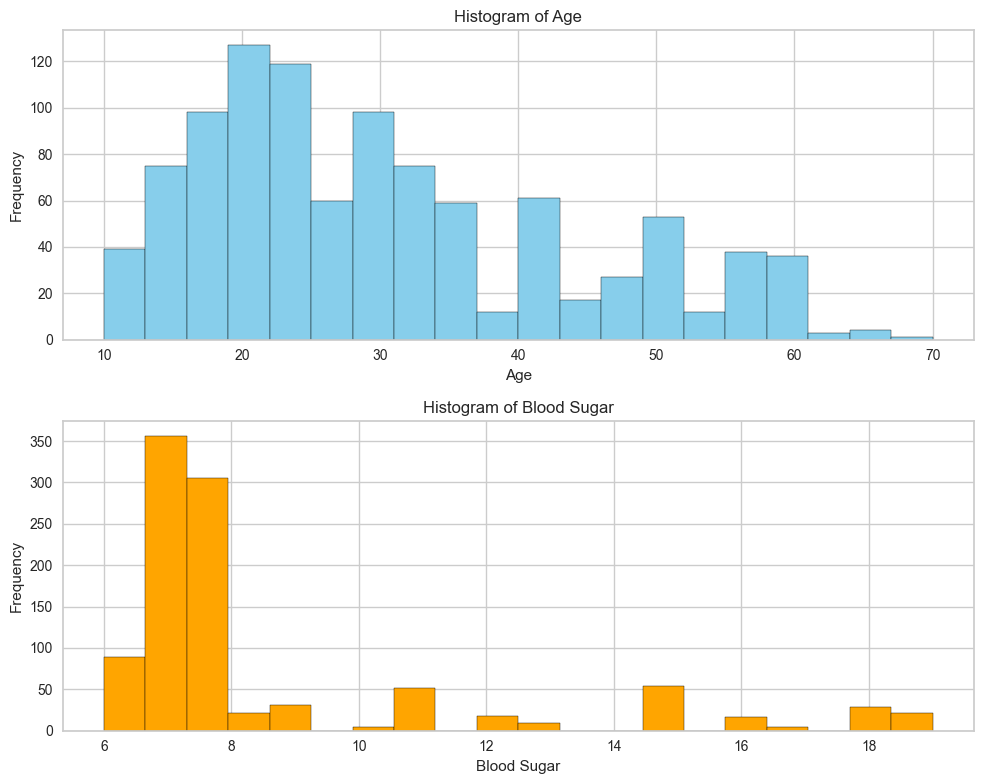

In [51]:
import matplotlib.pyplot as plt

def main():
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    axs[0].hist(df["Age"], bins=20, color='skyblue', edgecolor='black')
    axs[0].set_xlabel("Age")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title("Histogram of Age")
    axs[1].hist(df["BS"], bins=20, color='orange', edgecolor='black')
    axs[1].set_xlabel("Blood Sugar")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title("Histogram of Blood Sugar")
    
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()


We see from df.describe min age is 10, max age is 70. This minimum age value indicates the presence of individuals as young as 10 within the dataset. On the other end of the spectrum, the maximum age recorded is 70 years, portraying the upper limit of the age range covered in our data. This diversity in age, spanning from 10 to 70 years, underscores the inclusivity of the dataset, capturing a broad spectrum of age groups and facilitating a nuanced exploration of potential age-related patterns or trends in subsequent analyses. The age value "70" can be considered an outlier, but "10" to "14" range is controversial. In fact, the discussion here indicates that the data set has real values. (Elflein, J. (2023))

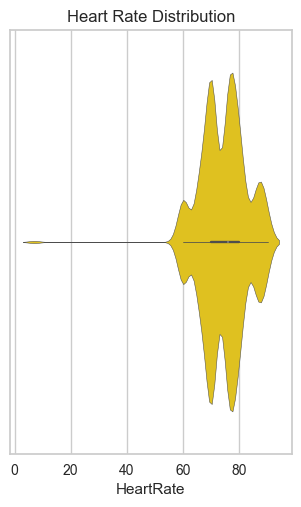

In [52]:
import matplotlib.colors as mcolors
gold_color = mcolors.CSS4_COLORS['gold']
plt.subplot(121)
sns.violinplot(x=df['HeartRate'], color=gold_color)
plt.title("Heart Rate Distribution")
plt.show()

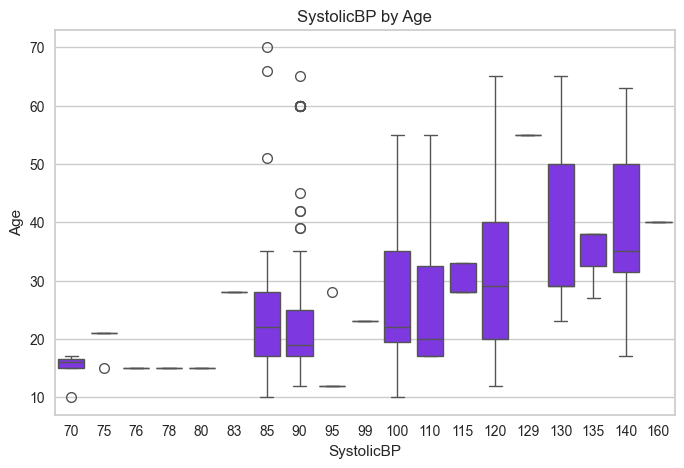

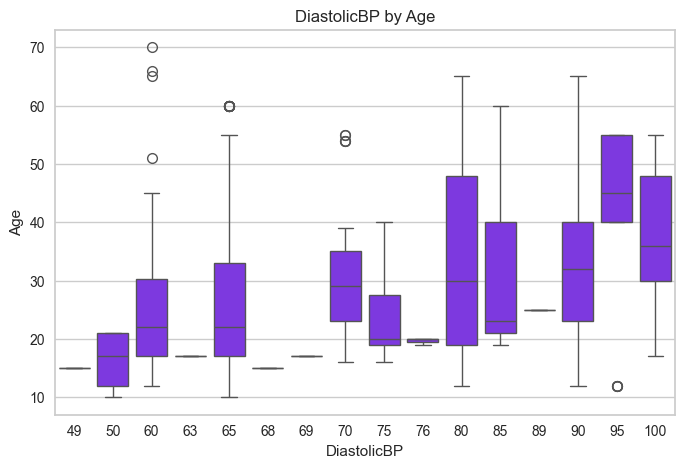

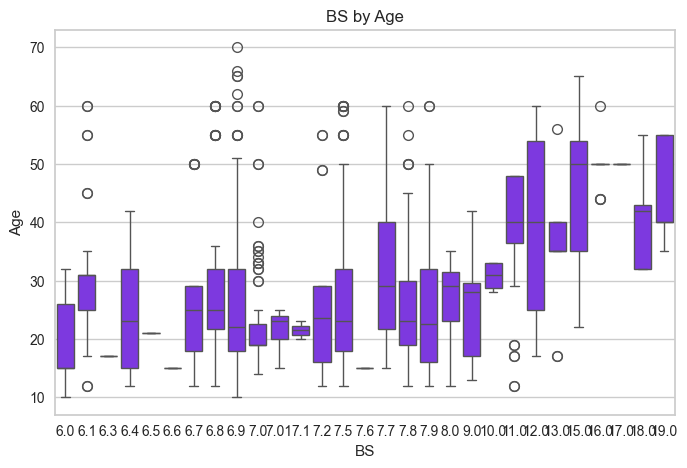

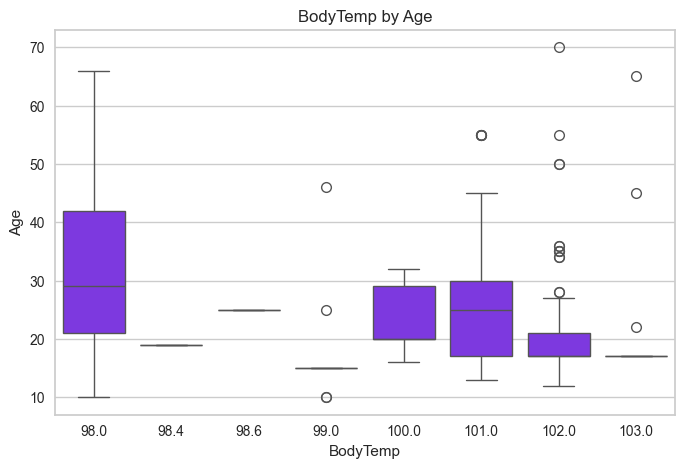

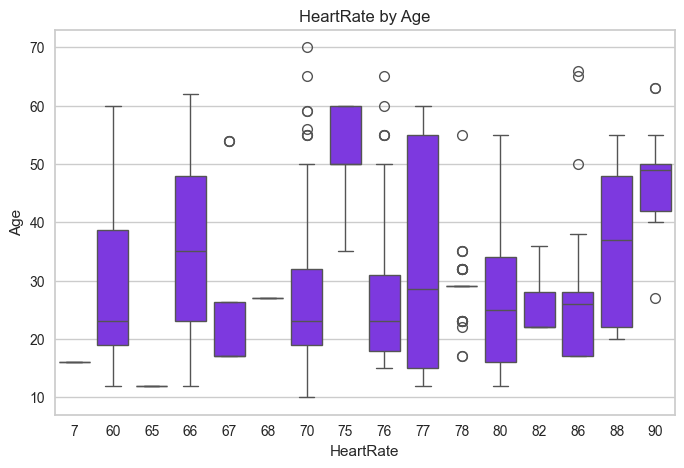

In [53]:
columns = df.columns[1:6]
for i in range(len(columns)):
    plt.figure(figsize = (8, 5))
    sns.boxplot(data = df, 
                x = columns[i], 
                y = "Age",
                color = "#781efa").set(title = f"{columns[i]} by Age");


Observation: It appears that a skewed distribution is caused by outliers in almost all variables. With the exception of HeartRate, we will just ignore that outlier for the time being as the value appears to be normal in this situation. There is an outlier in that variable whose value deviates too much from the rest of the range.

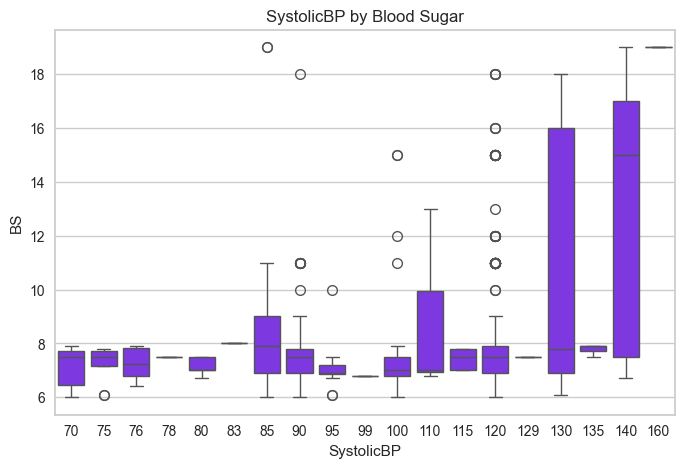

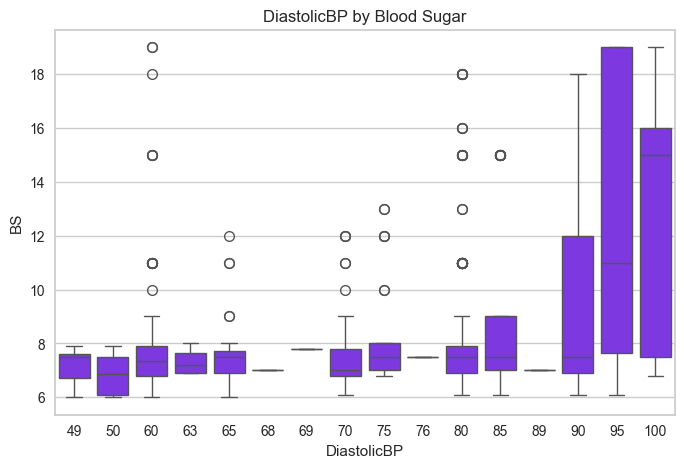

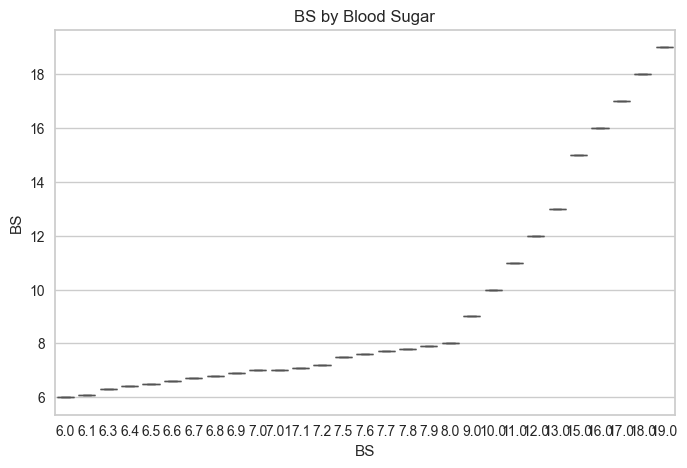

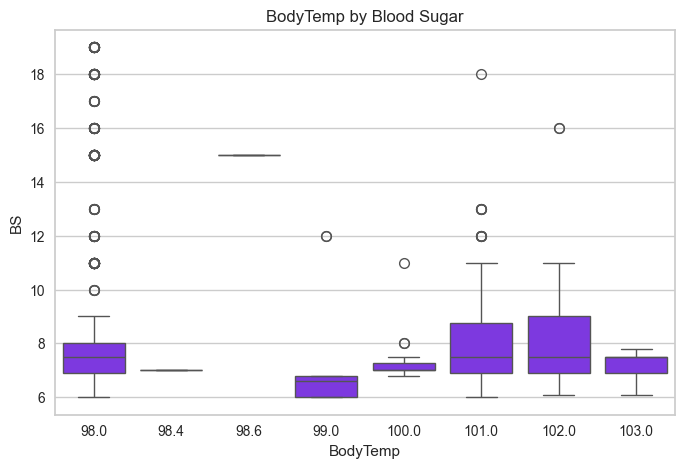

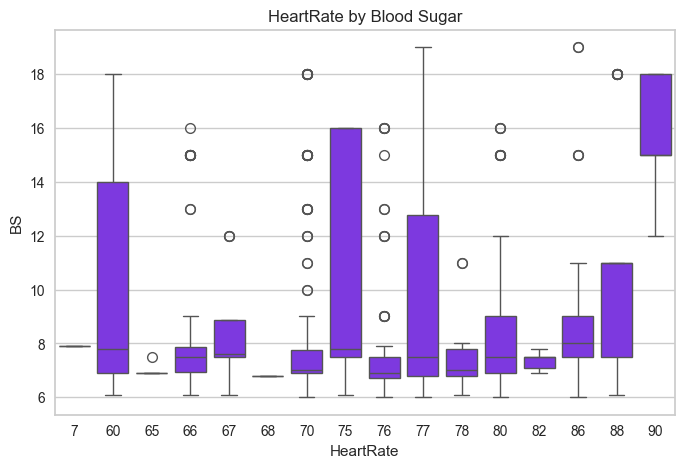

In [54]:
columns = df.columns[1:6]
for i in range(len(columns)):
    plt.figure(figsize = (8, 5))
    sns.boxplot(data = df, 
                x = columns[i], 
                y = "BS",
                color = "#781efa").set(title = f"{columns[i]} by Blood Sugar");


Based on our visualisations, it's evident that outliers are present across all variables. While one option could be to consider dropping these outliers, I'm inclined to retain them for now to gain insights into the nature of the provided dataset.

In [55]:
age_bins = [10, 20, 30, 40, 50, 60, 70, float('inf')]  
bin_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'] 

df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=bin_labels, right=False)

new_df = df.copy(deep=False)

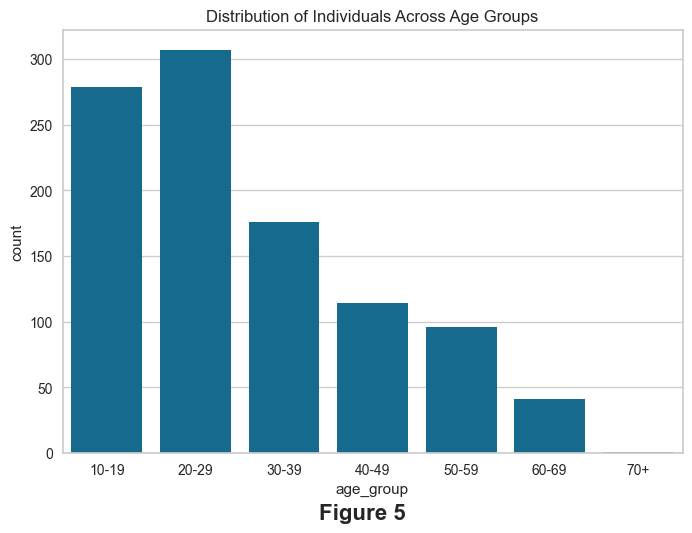

In [56]:
sns.countplot(new_df, x="age_group")
plt.title('Distribution of Individuals Across Age Groups')
plt.figtext(0.5,0.001,'Figure 5', ha='center', va='center',fontsize=16, fontweight='bold')
plt.show()

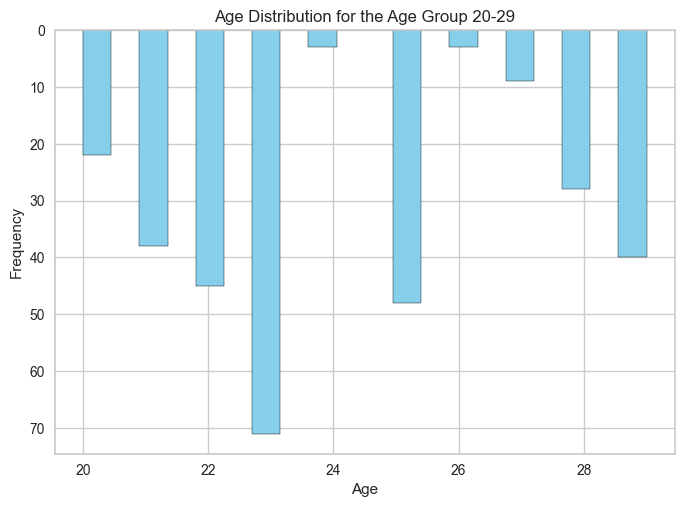

In [57]:
age_group_20_29 = new_df[new_df['age_group'] == '20-29']

plt.hist(age_group_20_29['Age'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.title("Age Distribution for the Age Group 20-29")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.gca().invert_yaxis() 
plt.show()


In [58]:
import plotly.express as px

color_map = {0: 'gold', 1: 'lightblue', 2: 'orange'}
fig = px.scatter_3d(df, x='BS', y='DiastolicBP', z='SystolicBP', color='RiskLevel', opacity=0.5,
                    color_discrete_map=color_map)
fig.update_layout(
    title='3D Scatter Plot: Blood Sugar, Diastolic BP, and Systolic BP',
    scene=dict(
        xaxis=dict(title='Blood Sugar'),
        yaxis=dict(title='Diastolic BP'),
        zaxis=dict(title='Systolic BP')
    )
)
fig.show()


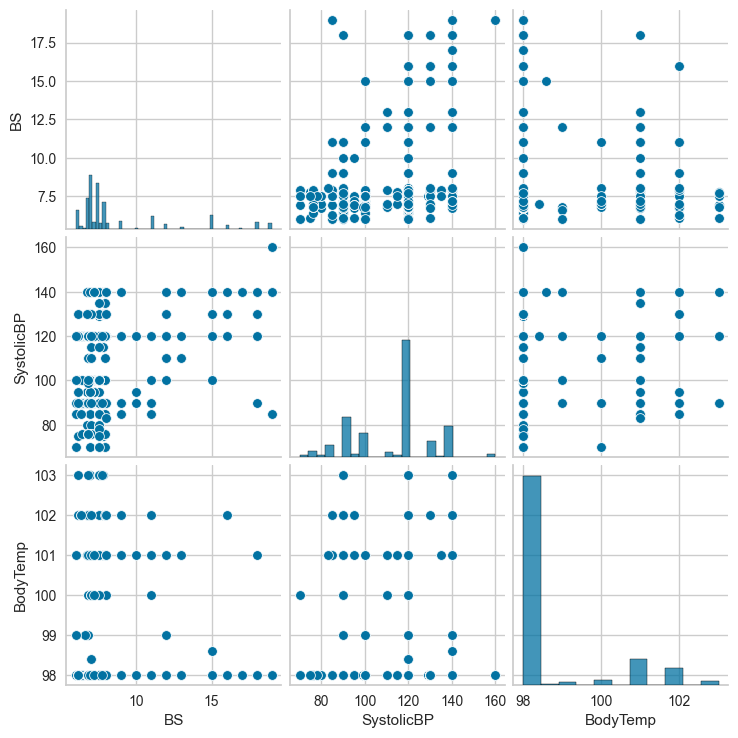

In [59]:
sns.pairplot(new_df[["BS", "SystolicBP", "BodyTemp"]])
plt.show()

A Seaborn pair plot provides a holistic perspective on the correlations between multiple features ("BS", "SystolicBP", "BodyTemp"), encompassing scatter plots and histograms to visualise bivariate relationships.

In [60]:
new_df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86          2   
1      35         140           90  13.0      98.0         70          2   
2      29          90           70   8.0     100.0         80          2   
3      30         140           85   7.0      98.0         70          2   
4      35         120           60   6.1      98.0         76          0   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80          2   
1010   55         120           90  18.0      98.0         60          2   
1011   35          85           60  19.0      98.0         86          2   
1012   43         120           90  18.0      98.0         70          2   
1013   32         120           65   6.0     101.0         76          1   

     age_group  
0        20-29  
1        30-39  
2        20-29  
3        30-39  
4        30-39  
...        ...  
1009     20-29  
1010     50-59  
1011     30-39  
1012     40-49  
1013     30-39  

[1014 rows x 8 columns]

The line plot illustrates the distribution of individuals across different age groups. Each point on the plot represents the risk level of individuals within specific age categories. It provides insight into how the risk level varies across different age groups, highlighting potential trends or patterns in maternal health risk. 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69'),
  Text(6, 0, '70+')])

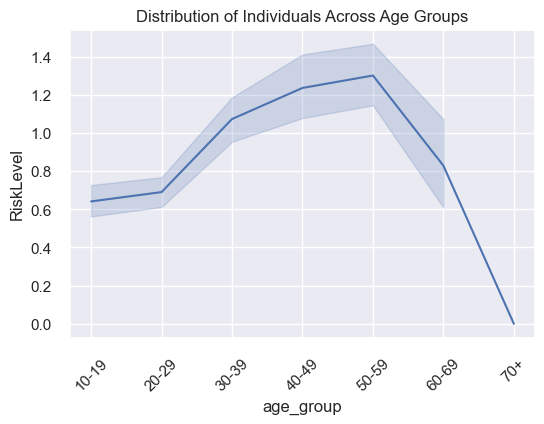

In [61]:
df = df.sort_values(by="age_group")
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.lineplot(x="age_group", y='RiskLevel', data=df)  
plt.title('Distribution of Individuals Across Age Groups')
plt.xticks(rotation=45)

The majority of patient records fall within the age range of 20-29, with the next highest number in the 10-19 age group, followed by 30-39, 40-49, 50-59, and 60-69. The number of records for individuals aged 70 and above is significantly lower, which is expected.

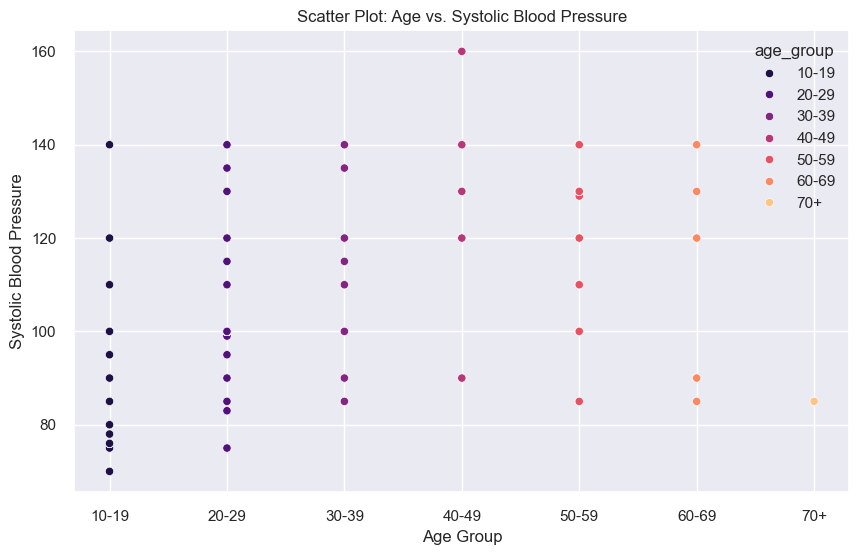

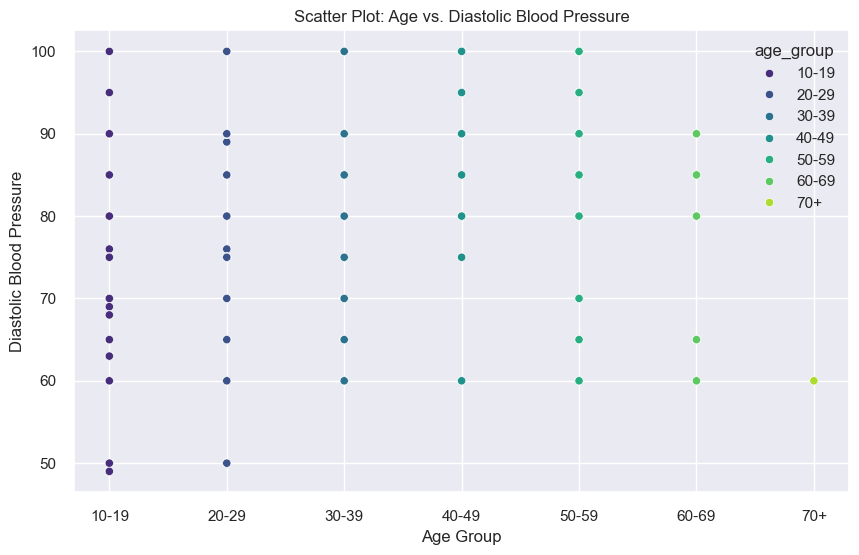

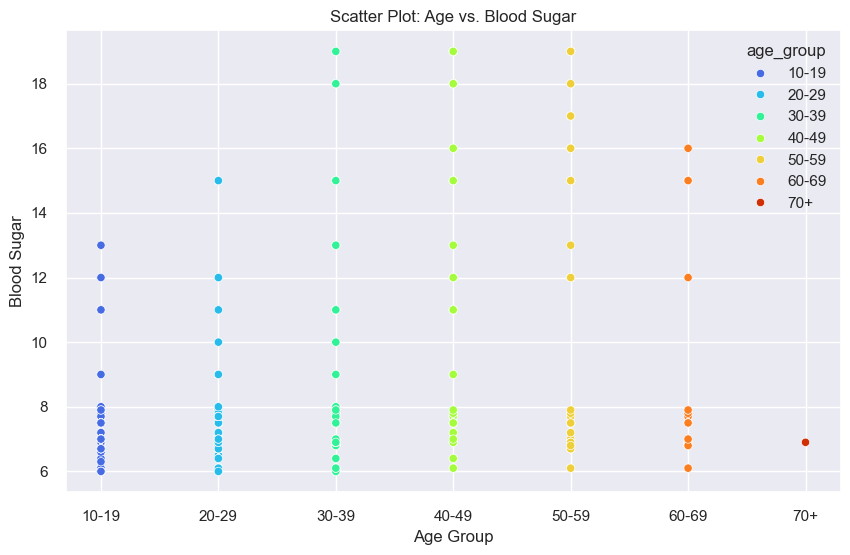

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_group', y='SystolicBP', hue='age_group', palette='magma')
plt.title('Scatter Plot: Age vs. Systolic Blood Pressure')
plt.xlabel("Age Group")
plt.ylabel('Systolic Blood Pressure')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_group', y='DiastolicBP', hue='age_group', markers=['o', 's', 'D', '^', 'x', '*', 'P'], palette='viridis')
plt.title('Scatter Plot: Age vs. Diastolic Blood Pressure')
plt.xlabel("Age Group")
plt.ylabel('Diastolic Blood Pressure')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_group', y='BS', hue='age_group', palette='turbo', markers=['o', 's', 'D', '^', 'x', '*', 'P'])
plt.title('Scatter Plot: Age vs. Blood Sugar')
plt.xlabel("Age Group")
plt.ylabel('Blood Sugar')
plt.grid(True)
plt.show()


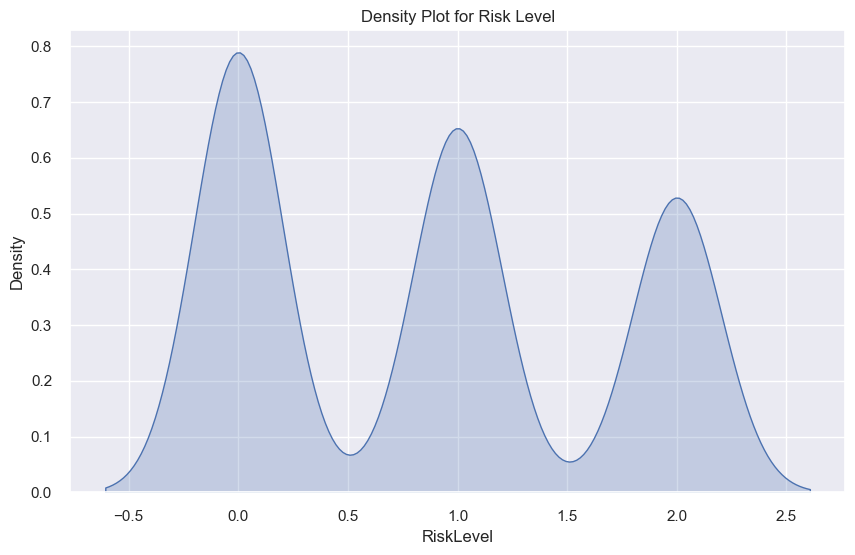

In [63]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["RiskLevel"], shade = True)
plt.title("Density Plot for Risk Level")
plt.show()

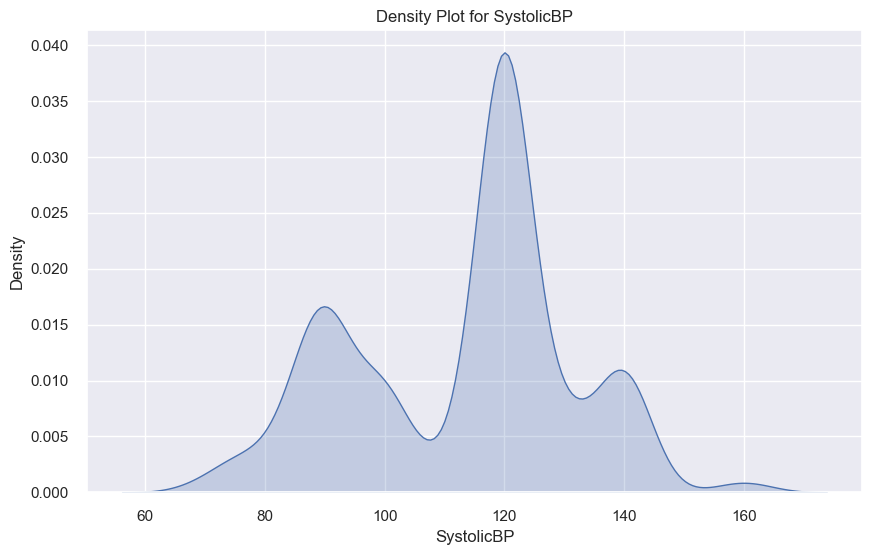

In [64]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["SystolicBP"], shade = True)
plt.title("Density Plot for SystolicBP")
plt.show()

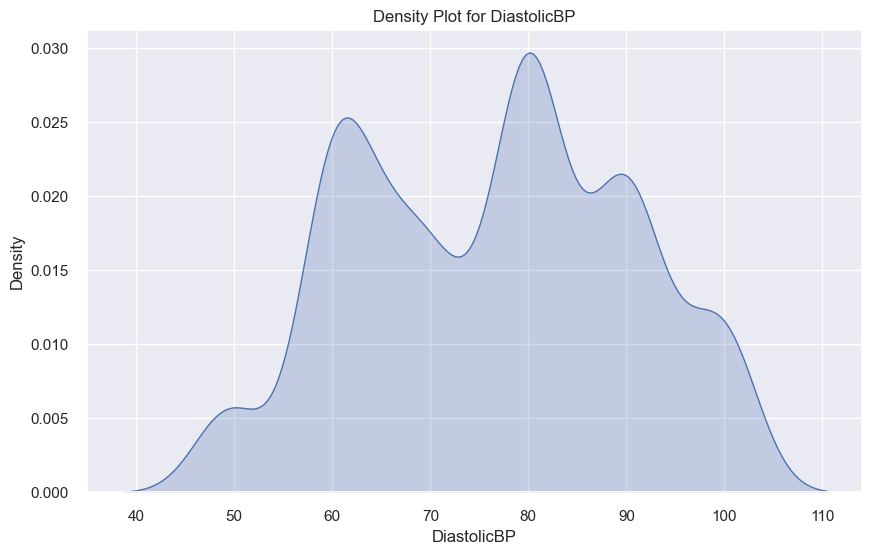

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["DiastolicBP"], shade = True)
plt.title("Density Plot for DiastolicBP")
plt.show()



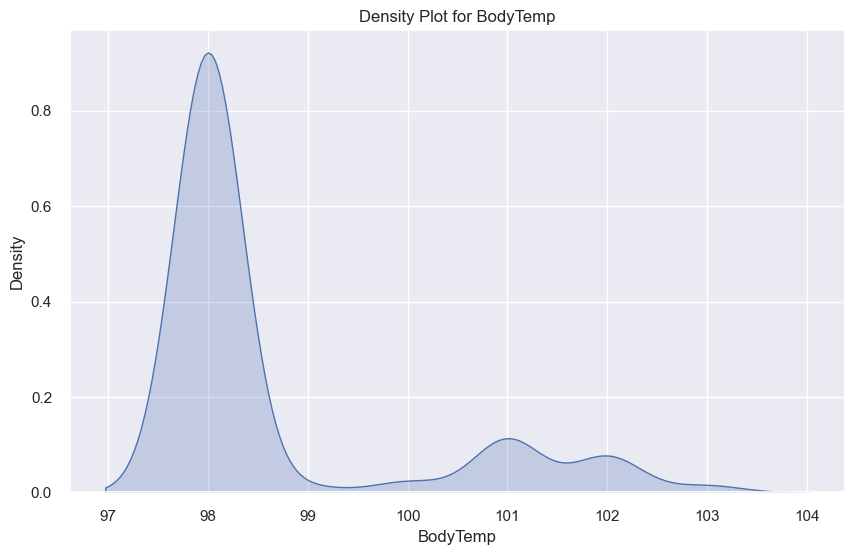

In [66]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["BodyTemp"], shade = True)
plt.title("Density Plot for BodyTemp")
plt.show()

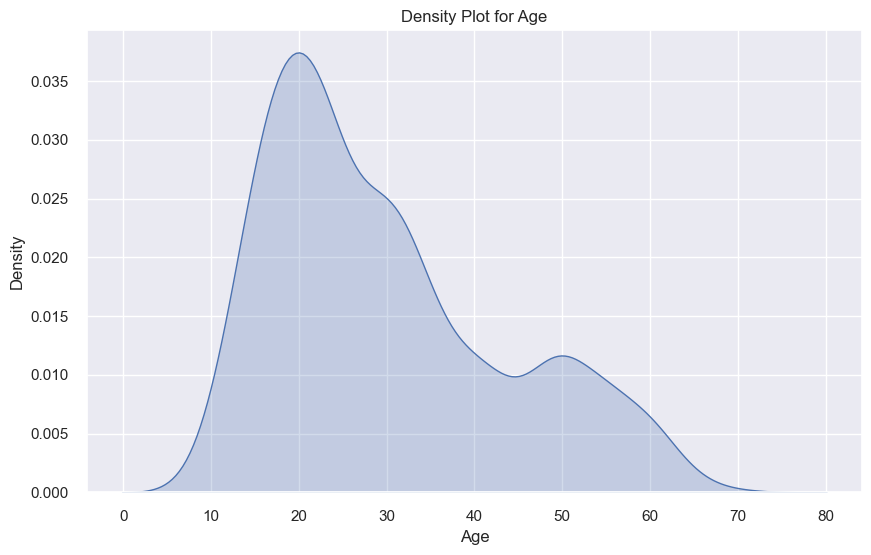

In [67]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["Age"], shade = True)
plt.title("Density Plot for Age")
plt.show()

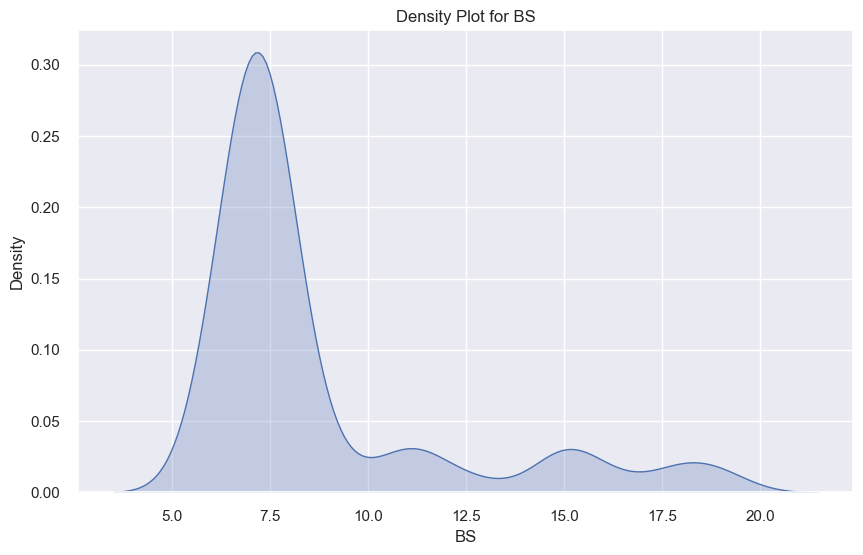

In [68]:
plt.figure(figsize=(10, 6))
sns.kdeplot(new_df["BS"], shade = True)
plt.title("Density Plot for BS")
plt.show()

BS and BodyTemp KDE plots are almost identical visualy, it indicates that the data distributions of the two variables are likely to be very similar. This suggests that the two variables exhibit similar patterns or behaviors in their data distribution, strong correlation or relationship between the variables.

## Distribution of features

 Examining the distribution of features helps us understand the underlying characteristics of the data. It provides insights into how the data is spread out, the central tendency, variability, and potential outliers.

In [69]:
df.drop(columns=["age_group" ], axis=1, inplace=True)
df.head()

Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate  RiskLevel
523   17          85           60  7.5     102.0         86          0
497   19         120           80  7.0      98.0         70          0
498   15          76           49  7.9      98.0         77          0
872   17          85           60  9.0     102.0         86          1
499   16         120           75  7.9      98.0          7          0

Pregnant women seem to have a body temperature of 98 F, which is normal body temperature
Pregnant women with body temperature >= 100 mostly has higher health risk.
Almost every pregnant women with blood glucose level >= 8 has high health risk.
But otherwise, they seems to have lower health risk with blood glucose < 8

In [70]:
Risk_counts = df['RiskLevel'].value_counts()
print(Risk_counts)

RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 523 to 338
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 59.4 KB


Now we have in our dataset 1014 rows and 7 features, and those 6 we will put through some visualisation.

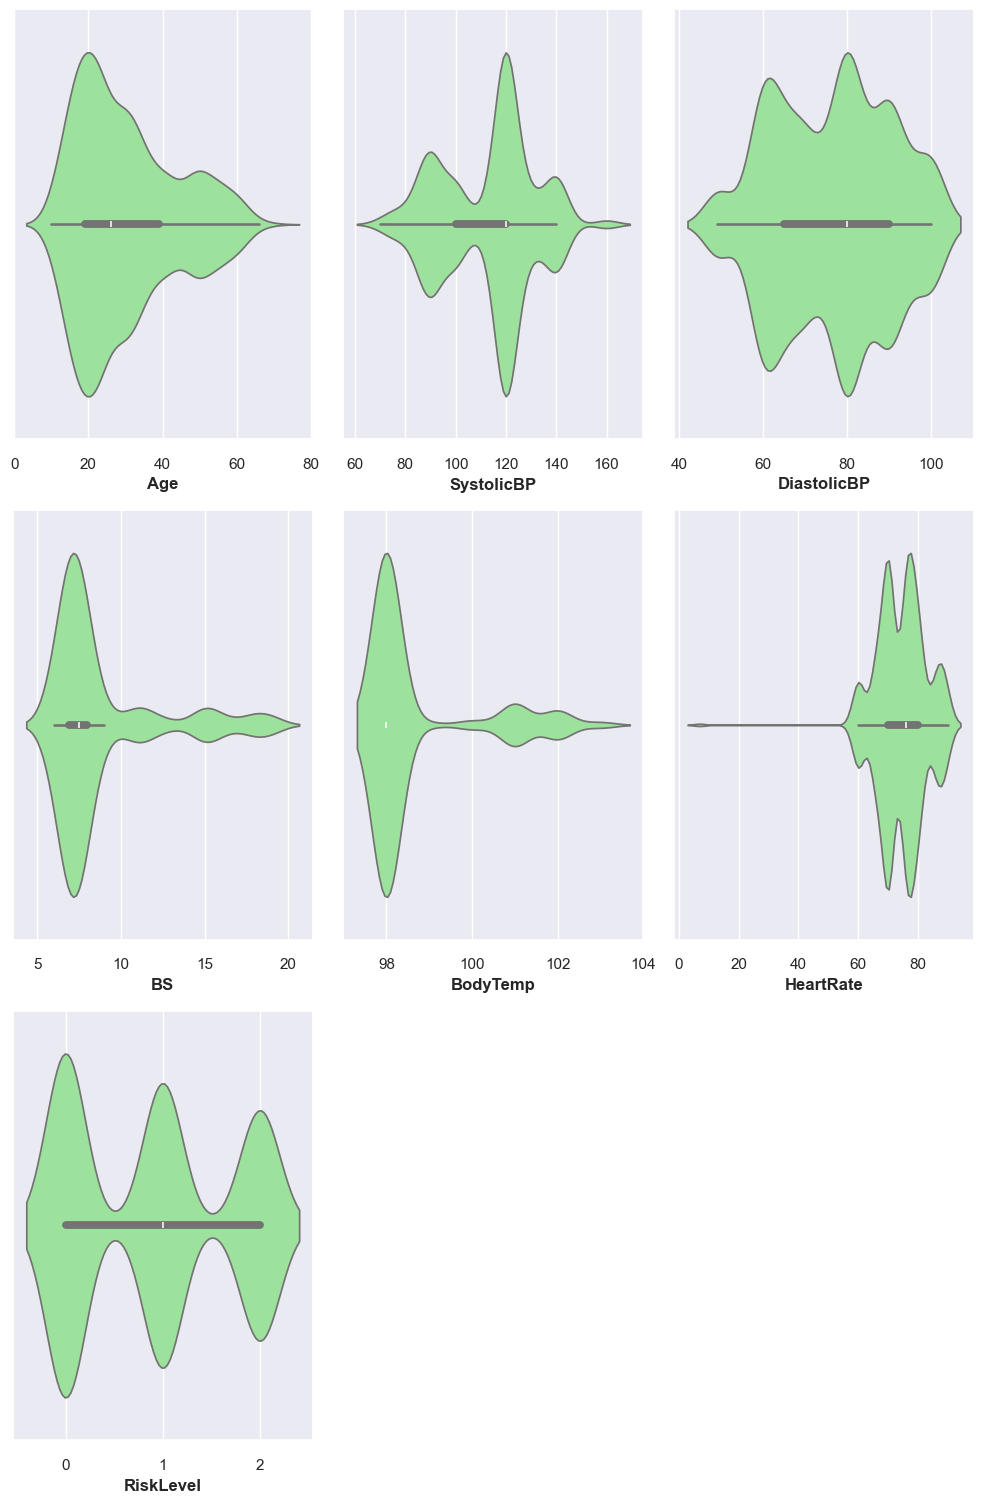

In [72]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(10, 300))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.violinplot(x=df[col], color='lightgreen')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


I tried few diferent ways to visualise our the most recent df. As per our visualisation, seems like all our data is skewed and does not conform to a Gaussian distribution.

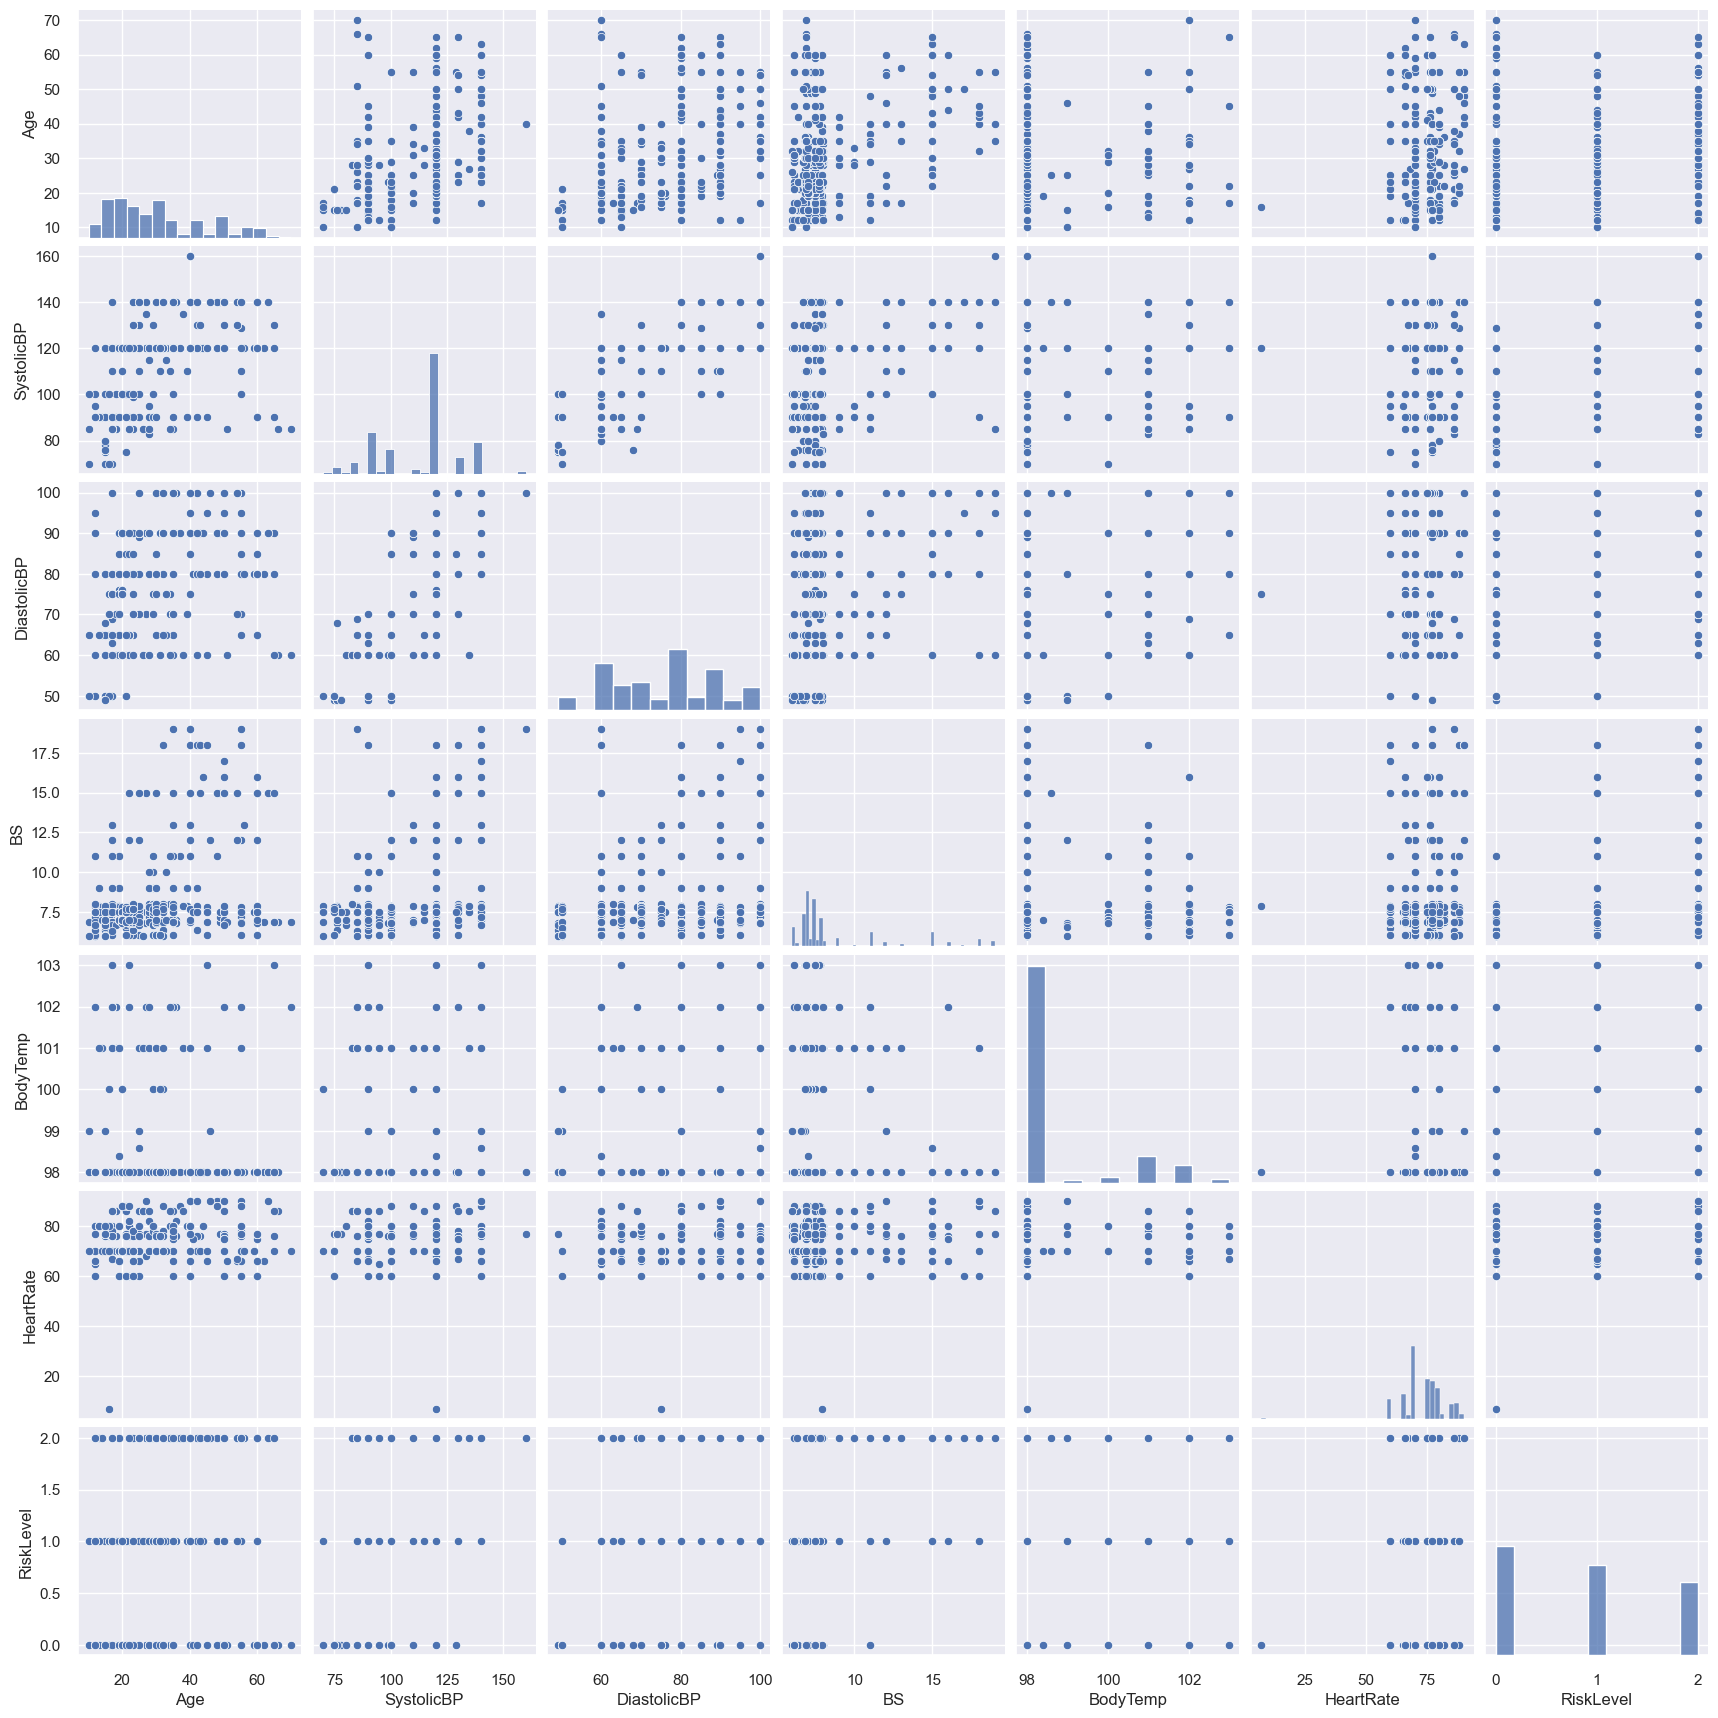

In [73]:
sns.pairplot(df)
plt.show()

Diastolic and systolic blood pressure have a strong correlation. The graph indicates a positive correlation between them, with a correlation coefficient of 0.79. This indicates that there is either very little or no variation in the data between the SystolicBP and DiastolicBP variables. Multicolinearity is the term for this issue, which calls into question the statistical significance of an independent variable. Since we don't want a redundant variable when creating or training our model, we can eliminate one of them. However, we'll try to delve further to determine which variables should be removed and whether we really need to remove these ones.

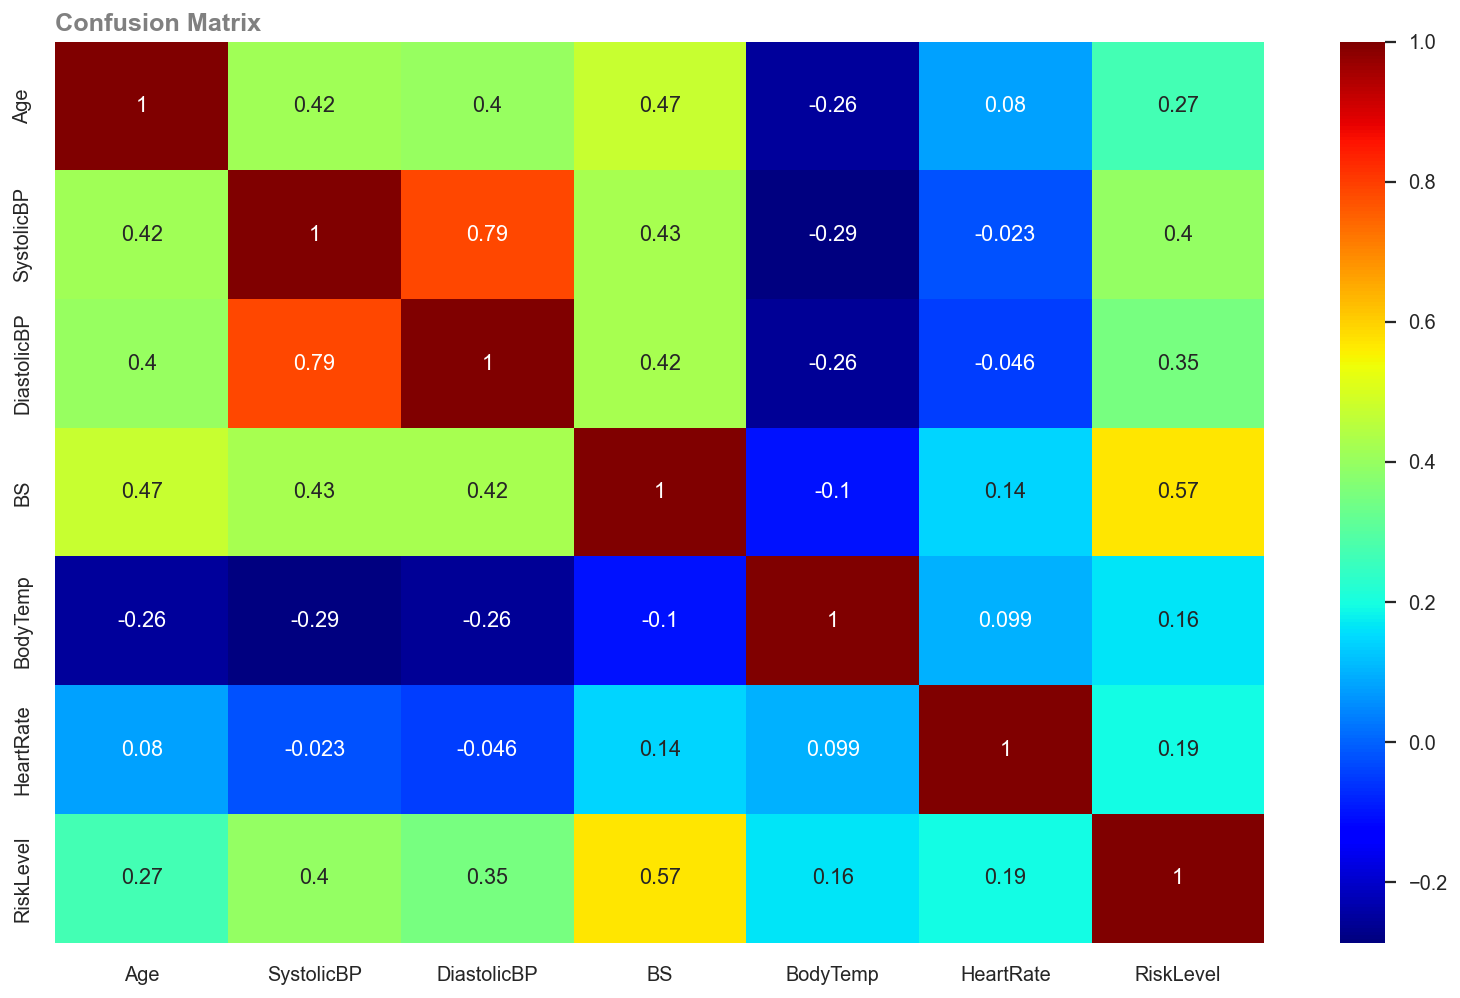

Text(0.5, 0.001, 'Figure 1_CA3')

<Figure size 800x550 with 0 Axes>

In [74]:
plt.figure(figsize=(15,9), dpi=130)
sns.heatmap(df.corr(), cmap="jet", annot=True)
plt.title('Confusion Matrix',fontsize=14,fontweight='bold', color='grey',loc='left')
plt.show()
plt.figtext(0.5,0.001,'Figure 1_CA3', ha='center', va='center',fontsize=16, fontweight='bold')

In [75]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(['RiskLevel'])
df[numeric_columns] = new_df[numeric_columns].apply(lambda x: np.log1p(x))
numeric_columns

Index(['Age', 'BS', 'BodyTemp', 'DiastolicBP', 'HeartRate', 'SystolicBP'], dtype='object')

In [76]:
df.RiskLevel

523    0
497    0
498    0
872    1
499    0
      ..
791    1
54     0
415    2
917    0
338    0
Name: RiskLevel, Length: 1014, dtype: int32

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 523 to 338
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   float64
 1   SystolicBP   1014 non-null   float64
 2   DiastolicBP  1014 non-null   float64
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   float64
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 59.4 KB


In [78]:
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

We are now dropping our target variable.

In [79]:
X.shape

(1014, 6)

In [80]:
y.shape

(1014,)

In [81]:
df.HeartRate.unique()

array([4.46590812, 4.26267988, 4.35670883, 2.07944154, 4.36944785,
       4.34380542, 4.39444915, 4.11087386, 4.20469262, 4.18965474,
       4.21950771, 4.41884061, 4.48863637, 4.2341065 , 4.51085951,
       4.33073334])

Due to the lack of variability in the HeartRate data, we have decided to remove it from the dataset.

In [82]:
df = df.drop(["HeartRate"], axis=1)

## Splitting Dataset

Splitting data into training and testing sets enables the evaluation of machine learning models on unseen data, aiding in assessing their generalisation performance. It helps prevent overfitting by detecting if the model has memorised the training data rather than learning underlying patterns. Furthermore, it facilitates hyperparameter tuning and validation, optimising model performance for real-world applications.

In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print('Training dataset: ', train.shape)
print('Test dataset: ', test.shape)

Training dataset:  (811, 6)
Test dataset:  (203, 6)


We will split our dataset into 80% train data and 20% test data.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1014, 6), (1014,), (811, 6), (203, 6), (811,), (203,))

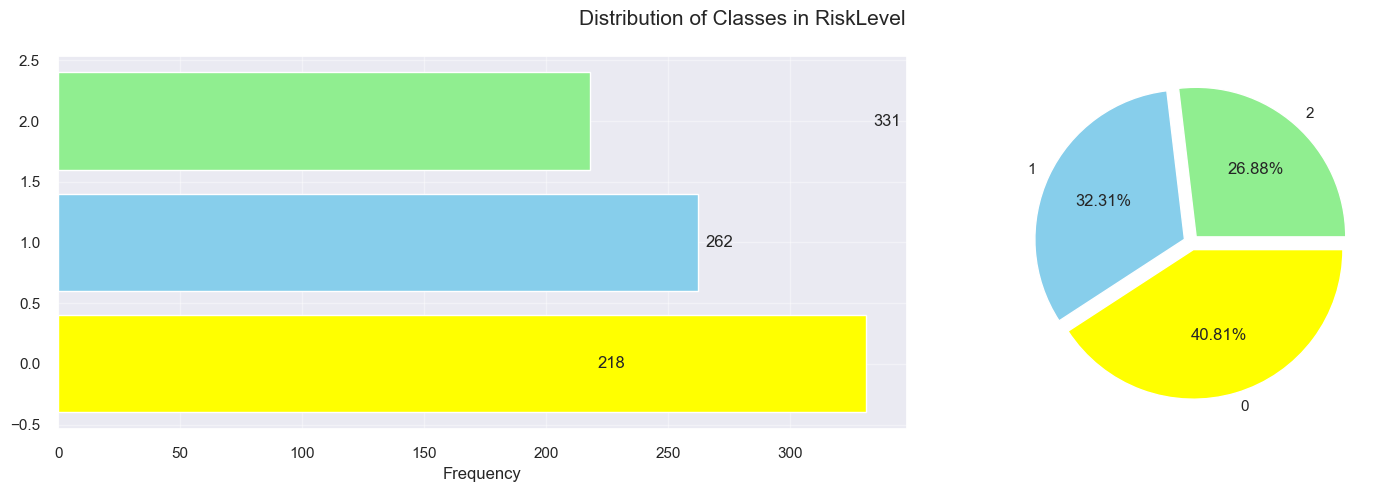

In [85]:
risk = train['RiskLevel'].value_counts().sort_values()

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=risk.index, width=risk.values, color=['lightgreen','skyblue','yellow'])
axes[0].set_xlabel('Frequency')
axes[0].grid(alpha=0.4)

for index, values in enumerate(risk):
    axes[0].text(values+3, index, str(values), va='center')

axes[1].pie(risk.values, labels=risk.index, colors=['lightgreen','skyblue','yellow'], autopct='%.2f%%', explode=[0.05,0.05,0.05])
figure.suptitle('Distribution of Classes in RiskLevel', fontsize=15)
plt.tight_layout()
plt.show()

In [86]:
Xtrain = train.drop(columns=['RiskLevel'], axis=1)
ytrain = train['RiskLevel']

Xtest = test.drop(columns=['RiskLevel'], axis=1)
ytest = test['RiskLevel']

print('X-train: ', Xtrain.shape)
print('y-train: ', ytrain.shape)
print('X-test:', Xtest.shape)
print('y-test: ',ytest.shape)

X-train:  (811, 5)
y-train:  (811,)
X-test: (203, 5)
y-test:  (203,)


The training set consists of 811 samples with 5 features, while the test set comprises 203 samples with the same 5 features, facilitating robust evaluation of the model's performance.

### KNN Imputer and MinMaxScaler

Keeping the data in its truest form in order to calculate the mean or median for imputation is best, but as the KNNImputer will be used for imputing the missing values in this dataset, it is better to scale the data in order for the KNNImputer to be more accurate (Gupta, 2023).
The KNNImputer calculates the distances between values and finds the nearest values based on distance, therefore scaling before using the KNNImputer helps the imputer be more accurate.
Scaling the data is important in order to compare the data, not by size but based on their right proportion. Scaling the data brings all the variables into the same standing.  The Standard Scaler can be influenced by outliers and the Robust Scaler is less likely to be influenced by outliers. MinMaxScaler will be used here. (Scikit Learn, 2023).
The target variable is dropped at this point as it does not need to be scaled.

In [87]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [88]:
X_scaled

array([[0.26409296, 0.23410491, 0.28282117, 0.18494182, 0.80390288,
        0.98151227],
       [0.32059306, 0.65114782, 0.68614401, 0.1271943 , 0.        ,
        0.89792803],
       [0.20093122, 0.09908772, 0.        , 0.22874459, 0.        ,
        0.9366005 ],
       ...,
       [0.91859327, 0.83798643, 0.85171188, 0.58966104, 0.        ,
        0.9366005 ],
       [0.91859327, 0.3031296 , 0.39486946, 0.18494182, 0.        ,
        0.9366005 ],
       [1.        , 0.23410491, 0.28282117, 0.11521248, 0.80390288,
        0.89792803]])

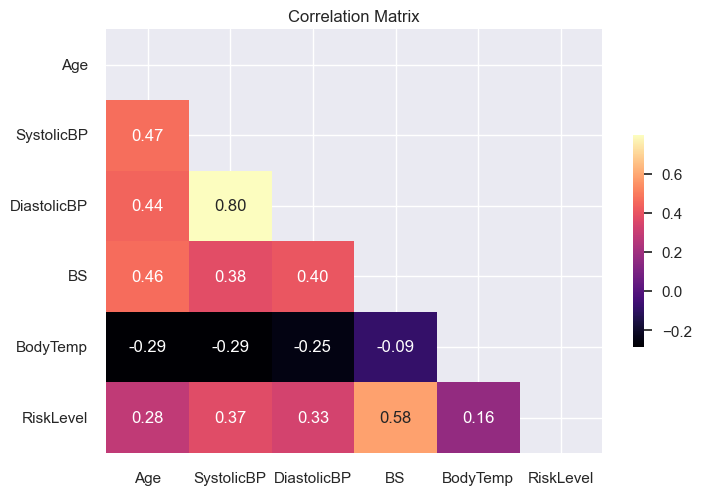

In [89]:
X_scaled = df.select_dtypes(include=[np.number])
corr = X_scaled.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, fmt=".2f", cmap='magma', cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals a notable correlation between BS and Risk Level, indicating a strong relationship between these two variables.

In [90]:
correlation_matrix = df.corr()

top_correlated_features = correlation_matrix.unstack().sort_values(ascending=False)
top_correlated_features = top_correlated_features[top_correlated_features != 1.0]

print("Top Correlated Features:")
print(top_correlated_features)

Top Correlated Features:
DiastolicBP  SystolicBP     0.795182
SystolicBP   DiastolicBP    0.795182
RiskLevel    BS             0.581512
BS           RiskLevel      0.581512
SystolicBP   Age            0.467084
Age          SystolicBP     0.467084
             BS             0.461779
BS           Age            0.461779
Age          DiastolicBP    0.444347
DiastolicBP  Age            0.444347
BS           DiastolicBP    0.404551
DiastolicBP  BS             0.404551
BS           SystolicBP     0.375455
SystolicBP   BS             0.375455
RiskLevel    SystolicBP     0.369630
SystolicBP   RiskLevel      0.369630
RiskLevel    DiastolicBP    0.332202
DiastolicBP  RiskLevel      0.332202
Age          RiskLevel      0.283380
RiskLevel    Age            0.283380
             BodyTemp       0.164198
BodyTemp     RiskLevel      0.164198
BS           BodyTemp      -0.086334
BodyTemp     BS            -0.086334
DiastolicBP  BodyTemp      -0.250528
BodyTemp     DiastolicBP   -0.250528
Age          

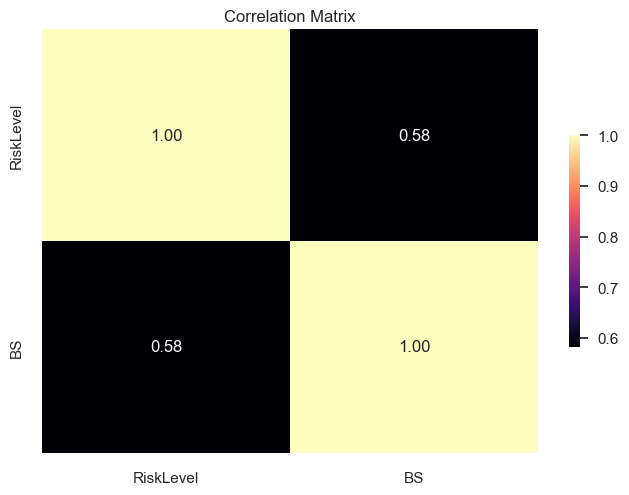

In [91]:
corr = X_scaled[['RiskLevel','BS']].corr()
sns.heatmap(corr,  annot=True, fmt=".2f", cmap='magma', cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

In [92]:
import statsmodels.api as sm
X = sm.add_constant(df['BS'])
y = df['RiskLevel']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              RiskLevel   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     517.1
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.63e-93
Time:                        17:15:37   Log-Likelihood:                -1012.1
No. Observations:                1014   AIC:                             2028.
Df Residuals:                    1012   BIC:                             2038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9373      0.169    -17.421      0.0

 This regression analysis suggests that blood sugar is a statistically significant predictor of the risk level, with higher blood sugar levels associated with higher risk levels. A small p-value for the F-statistic suggests that the regression model as a whole is statistically significant in explaining the variability in the dependent variable. In this case, the F-statistic is 517.1 with a very small p-value, indicating that the regression model is statistically significant.

# Principal Component Analysis (PCA) 

In [93]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_scaled)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

transformed_data = pca.transform(X_scaled)
transformed_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])

print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components:", principal_components)

Explained Variance Ratio: [7.32381122e-01 1.82056165e-01 4.19925943e-02 3.70196191e-02
 6.40201359e-03 1.48485791e-04]
Principal Components: [[ 0.20745922  0.08862851  0.08982882  0.21516918  0.00165431  0.94590482]
 [-0.90705544 -0.16535414 -0.18396128 -0.19802109  0.01293866  0.27692402]
 [ 0.35069311 -0.26771148 -0.38482413 -0.79363781  0.00967728  0.16522913]
 [ 0.10362649 -0.56663974 -0.62034476  0.53127388  0.01016365 -0.03159258]
 [-0.02105164  0.75601709 -0.65204869  0.04847107 -0.01562351 -0.0152956 ]
 [ 0.00661902  0.02216111  0.00207397  0.00524563  0.99969436 -0.00666673]]


In [94]:
transformed_df

PC1       PC2       PC3       PC4       PC5       PC6
0    -0.977350  0.270202 -0.070045  0.223516 -0.041356  0.028896
1    -0.912868  0.077500 -0.185900 -0.167566  0.027338 -0.002167
2    -1.019616  0.422278 -0.042114  0.421333  0.010060 -0.014101
3     0.003524  0.514943 -0.033797  0.278266 -0.048775  0.023082
4    -0.929368  0.215524 -0.302984 -0.088243  0.077473 -0.002815
...        ...       ...       ...       ...       ...       ...
1009  0.258936 -0.652058  0.390495 -0.097051 -0.012660 -0.001585
1010 -0.725171 -0.849206  0.360262  0.236489 -0.078014 -0.001525
1011  1.338769 -0.522997  0.064564 -0.016148  0.036546 -0.001941
1012 -0.712126 -0.861211  0.312148  0.268697 -0.075076 -0.001207
1013 -0.708403 -0.960062  0.469311  0.326833 -0.073794  0.037596

[1014 rows x 6 columns]

In [95]:
X_scaled

Age  SystolicBP  DiastolicBP        BS  BodyTemp  RiskLevel
523  2.890372    4.454347     4.110874  2.140066  4.634729          0
497  2.995732    4.795791     4.394449  2.079442  4.595120          0
498  2.772589    4.343805     3.912023  2.186051  4.595120          0
872  2.890372    4.454347     4.110874  2.302585  4.634729          1
499  2.833213    4.795791     4.330733  2.186051  4.595120          0
..        ...         ...          ...       ...       ...        ...
791  4.110874    4.795791     4.394449  2.054124  4.595120          1
54   4.110874    4.510860     4.189655  2.079442  4.595120          0
415  4.110874    4.948760     4.510860  2.564949  4.595120          2
917  4.110874    4.510860     4.189655  2.140066  4.595120          0
338  4.262680    4.454347     4.110874  2.066863  4.634729          0

[1014 rows x 6 columns]

# Machine Learning Algorithms by Train ad Test

In [96]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
XGBClassifier = xgb.XGBClassifier()
XGBClassifier.fit(X_train, y_train)
print("Train accuracy:", XGBClassifier.score(X_train,y_train))
print("Test accuracy:", XGBClassifier.score(X_test,y_test))
y_pred = XGBClassifier.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, XGBClassifier.predict(X_test)))

Train accuracy: 0.6436498150431565
Test accuracy: 0.645320197044335
[0 0 1 2 0 0 0 0 2 1 0 1 1 2 1 1 2 0 0 2 0 0 0 0 1 2 1 2 0 0 1 1 0 1 1 0 2
 0 0 1 1 0 0 0 1 1 0 0 1 2 0 1 1 1 1 2 1 0 1 0 2 1 0 0 0 2 0 0 1 1 0 0 1 1
 2 2 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 2 2 1 2 2 1 0 2 2 1 2 2
 0 0 0 0 0 2 0 1 2 2 0 2 2 0 1 2 0 0 0 0 1 1 0 0 0 1 0 2 1 2 2 0 0 0 1 1 2
 1 0 0 0 0 0 2 2 0 2 0 1 2 0 0 2 2 2 1 2 0 0 0 1 2 1 0 1 1 0 0 2 1 0 0 0 1
 0 2 1 0 0 0 0 0 0 0 1 0 1 0 1 2 0 2]
CM: [[61 13  1]
 [32 34  8]
 [ 7 11 36]]
Accuracy: 64.5320197044335 %
Test accuracy: 0.645320197044335
              precision    recall  f1-score   support

           0       0.61      0.81      0.70        75
           1       0.59      0.46      0.52        74
           2       0.80      0.67      0.73        54

    accuracy                           0.65       203
   macro avg       0.67      0.65      0.65       203
weighted avg       0.65      0.65      0.64       203



In [97]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

decision_tree.fit(X_train, y_train)
print("Train accuracy:", decision_tree.score(X_train,y_train))
print("Test accuracy:", decision_tree.score(X_test,y_test))
y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.6436498150431565
Test accuracy: 0.645320197044335
[0 0 1 2 0 0 0 0 2 1 0 1 1 2 1 1 2 0 0 2 0 0 0 0 1 2 1 2 0 0 1 1 0 1 1 0 2
 0 0 1 1 0 0 0 1 1 0 0 1 2 0 1 1 1 1 2 1 0 1 0 2 1 0 0 0 2 0 0 1 1 0 0 1 1
 2 2 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 2 2 1 2 2 1 0 2 2 1 2 2
 0 0 0 0 0 2 0 1 2 2 0 2 2 0 1 2 0 0 0 0 1 1 0 0 0 1 0 2 1 2 2 0 0 0 1 1 2
 1 0 0 0 0 0 2 2 0 2 0 1 2 0 0 2 2 2 1 2 0 0 0 1 2 1 0 1 1 0 0 2 1 0 0 0 1
 0 2 1 0 0 0 0 0 0 0 1 0 1 0 1 2 0 2]
CM: [[61 13  1]
 [32 34  8]
 [ 7 11 36]]
Accuracy: 64.5320197044335 %
              precision    recall  f1-score   support

           0       0.61      0.81      0.70        75
           1       0.59      0.46      0.52        74
           2       0.80      0.67      0.73        54

    accuracy                           0.65       203
   macro avg       0.67      0.65      0.65       203
weighted avg       0.65      0.65      0.64       203



In [98]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest
print("Train accuracy:", random_forest.score(X_train,y_train))
print("Test accuracy:", random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:', accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.6436498150431565
Test accuracy: 0.6551724137931034
[0 0 1 2 0 1 0 0 2 1 0 1 1 2 1 1 2 0 0 2 0 0 0 0 1 2 1 2 0 1 1 1 0 1 1 0 2
 0 0 1 1 0 0 0 1 1 0 0 1 2 0 1 1 1 1 2 1 0 1 0 2 1 0 0 0 2 0 0 1 1 0 0 1 1
 2 2 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 2 2 1 2 2 1 0 2 2 1 2 2
 0 0 1 0 0 2 1 1 2 2 0 2 2 0 1 2 0 0 0 0 1 1 0 0 1 1 0 2 1 2 2 0 0 0 1 1 2
 1 0 0 0 0 1 2 2 1 2 0 1 2 0 0 2 2 2 1 2 0 0 0 1 2 1 0 1 1 0 0 2 1 0 0 0 1
 0 2 1 0 0 0 0 0 0 0 1 0 1 0 1 2 0 2]
CM: [[57 17  1]
 [26 40  8]
 [ 7 11 36]]
Accuracy: 65.51724137931035 %
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        75
           1       0.59      0.54      0.56        74
           2       0.80      0.67      0.73        54

    accuracy                           0.66       203
   macro avg       0.67      0.66      0.66       203
weighted avg       0.66      0.66      0.65       203



In [99]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

print("Train accuracy:", nb.score(X_train, y_train))
print("Test accuracy:", nb.score(X_test, y_test))

y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.5893958076448829
Test accuracy: 0.5467980295566502
[0 0 0 2 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 2 1 0 1 0 0 0 0 0
 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2
 0 0 0 0 0 2 0 1 2 2 0 2 2 0 2 2 0 1 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 1 0 0 2
 0 0 0 0 1 0 2 2 0 2 0 1 2 0 0 2 2 2 1 2 0 0 0 0 2 0 0 1 1 0 0 2 0 0 1 0 0
 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2]
CM: [[68  7  0]
 [58  8  8]
 [14  5 35]]
Accuracy: 54.679802955665025 %
              precision    recall  f1-score   support

           0       0.49      0.91      0.63        75
           1       0.40      0.11      0.17        74
           2       0.81      0.65      0.72        54

    accuracy                           0.55       203
   macro avg       0.57      0.55      0.51       203
weighted avg       0.54      0.55      0.49       203



In [100]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Train accuracy:", lr.score(X_train, y_train))
print("Test accuracy:", lr.score(X_test, y_test))

y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)
print("Accuracy:", accuracy_score(y_test, y_pred_lr) * 100, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Train accuracy: 0.5906288532675709
Test accuracy: 0.5714285714285714
Confusion Matrix:
[[75  0  0]
 [60  6  8]
 [15  4 35]]
Accuracy: 57.14285714285714 %
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        75
           1       0.60      0.08      0.14        74
           2       0.81      0.65      0.72        54

    accuracy                           0.57       203
   macro avg       0.64      0.58      0.51       203
weighted avg       0.62      0.57      0.49       203



In [101]:
svm = SVC()
svm.fit(X_train, y_train)

print("Train accuracy:", svm.score(X_train, y_train))
print("Test accuracy:", svm.score(X_test, y_test))
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)
print("Accuracy:", accuracy_score(y_test, y_pred_svm) * 100, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Train accuracy: 0.5745992601726264
Test accuracy: 0.541871921182266
Confusion Matrix:
[[75  0  0]
 [66  0  8]
 [19  0 35]]
Accuracy: 54.187192118226605 %
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        75
           1       0.00      0.00      0.00        74
           2       0.81      0.65      0.72        54

    accuracy                           0.54       203
   macro avg       0.43      0.55      0.45       203
weighted avg       0.39      0.54      0.43       203



In [102]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)
print("Accuracy:", accuracy_score(y_test, y_pred_knn) * 100, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Train accuracy: 0.6103575832305795
Test accuracy: 0.6157635467980296
Confusion Matrix:
[[65  9  1]
 [42 23  9]
 [10  7 37]]
Accuracy: 61.57635467980296 %
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68        75
           1       0.59      0.31      0.41        74
           2       0.79      0.69      0.73        54

    accuracy                           0.62       203
   macro avg       0.64      0.62      0.61       203
weighted avg       0.63      0.62      0.59       203



In [103]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print("Train accuracy:", lda.score(X_train, y_train))
print("Test accuracy:", lda.score(X_test, y_test))
y_pred_lda = lda.predict(X_test)
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix:")
print(cm_lda)
print("Accuracy:", accuracy_score(y_test, y_pred_lda) * 100, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred_lda))

Train accuracy: 0.5745992601726264
Test accuracy: 0.541871921182266
Confusion Matrix:
[[75  0  0]
 [66  0  8]
 [19  0 35]]
Accuracy: 54.187192118226605 %
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        75
           1       0.00      0.00      0.00        74
           2       0.81      0.65      0.72        54

    accuracy                           0.54       203
   macro avg       0.43      0.55      0.45       203
weighted avg       0.39      0.54      0.43       203



In [104]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Train accuracy:", mlp.score(X_train, y_train))
print("Test accuracy:", mlp.score(X_test, y_test))
y_pred_mlp = mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(cm_mlp)
print("Accuracy:", accuracy_score(y_test, y_pred_mlp) * 100, "%")
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Train accuracy: 0.5745992601726264
Test accuracy: 0.541871921182266
Confusion Matrix:
[[75  0  0]
 [66  0  8]
 [19  0 35]]
Accuracy: 54.187192118226605 %
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        75
           1       0.00      0.00      0.00        74
           2       0.81      0.65      0.72        54

    accuracy                           0.54       203
   macro avg       0.43      0.55      0.45       203
weighted avg       0.39      0.54      0.43       203



In [105]:
classifiers = ['GaussianNB', 'RandomForest', 'DecisionTree', 'XGB', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'LDA', 'MLPClassifier']
train_accuracies = [62.52, 92.60, 92.60, 92.60, 62.27, 57.21, 79.53, 62.76, 56.22 ]
test_accuracies = [60.59, 87.68, 85.71, 87.19, 59.11, 54.18, 77.83, 65.02, 51.23]
train_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightcyan', 'papayawhip', 'cyan', 'rebeccapurple']
test_colors = ['skyblue', 'lightseagreen', 'indianred', 'salmon', 'lightsteelblue', 'paleturquoise', 'lightgrey', 'violet', 'rosybrown']
fig = go.Figure()
train_bar = go.Bar(x=classifiers, y=train_accuracies, name='Train Accuracy', marker_color=train_colors)
fig.add_trace(train_bar)

test_bar = go.Bar(x=classifiers, y=test_accuracies, name='Test Accuracy', marker_color=test_colors)
fig.add_trace(test_bar)

for i, accuracy in enumerate(train_accuracies):
    fig.add_annotation(
        x=classifiers[i],
        y=accuracy,
        text=f"{accuracy:.2f}%",
        showarrow=False,
        font=dict(color='black', size=10),
        xshift=5,
        yshift=5,
        align='left'
    )
for i, accuracy in enumerate(test_accuracies):
    fig.add_annotation(
        x=classifiers[i],
        y=accuracy,
        text=f"{accuracy:.2f}%",
        showarrow=False,
        font=dict(color='black', size=10),
        xshift=5,
        yshift=-15,
        align='right'
    )
fig.update_layout(
    title='Training and Testing Accuracies of Different Classifiers',
    xaxis_title='Classifier',
    yaxis_title='Accuracy (%)'
)
fig.show()

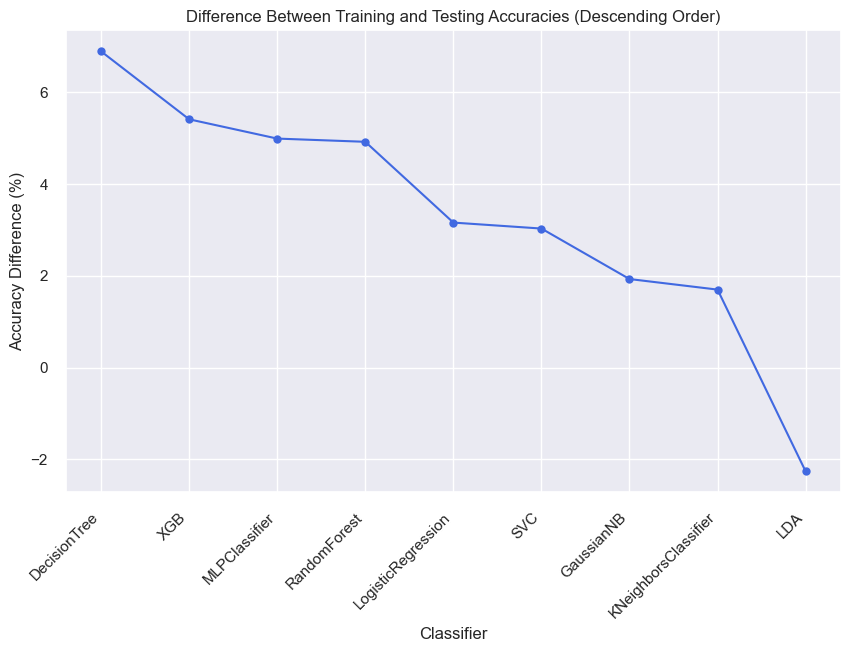

In [106]:
accuracy_difference = [train_accuracies[i] - test_accuracies[i] for i in range(len(classifiers))]
classifier_diff_tuples = zip(classifiers, accuracy_difference)
sorted_classifier_diff = sorted(classifier_diff_tuples, key=lambda x: x[1], reverse=True)
sorted_classifiers, sorted_diffs = zip(*sorted_classifier_diff)

plt.figure(figsize=(10, 6))
plt.plot(sorted_classifiers, sorted_diffs, marker='o', color='royalblue', linestyle='-')
plt.title('Difference Between Training and Testing Accuracies (Descending Order)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Difference (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


This visualisation illustrates the discrepancy between training and testing accuracies for various classifiers, revealing potential overfitting or underfitting tendencies. Classifiers such as RandomForest and DecisionTree exhibit smaller discrepancies, suggesting better generalisation to unseen data, while models like LogisticRegression and MLPClassifier show larger disparities, indicating potential overfitting to the training data. Understanding these differences aids in selecting the most appropriate classifier for achieving optimal performance and generalisation in real-world applications.

## Machine Learning Modelling by Mean

In [107]:
from xgboost import XGBClassifier

K-Nearest Neighbors (KNN) demonstrates the highest mean accuracy among the evaluated algorithms, closely followed by Linear Discriminant Analysis (LDA).
Classification and Regression Trees (CART) show a lower mean accuracy, suggesting potential limitations in capturing complex relationships within the data.
Logistic Regression (LR), Naive Bayes (NB), and Support Vector Machines (SVM) exhibit competitive mean accuracy scores.

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('MLP', MLPClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(clone(model), X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LR: 0.5746160794941283 (0.026292643055506958)
LDA: 0.5746160794941283 (0.026292643055506958)
KNN: 0.5548780487804879 (0.04386992245660299)
CART: 0.6140620295091841 (0.06667703620882078)
NB: 0.5893706714844927 (0.03431381384733824)
SVM: 0.5746160794941283 (0.026292643055506958)
RF: 0.6165311653116532 (0.07181054158528438)
XGB: 0.6177657332128879 (0.0721305288425197)
MLP: 0.5906353507979524 (0.026790781892584156)


This conclusion provides a summary of the performance of the evaluated algorithms and highlights potential considerations for choosing between them in the context of the Maternal Health Risk Analysis project. Mean accuracy provides a broader view of model performance across different data splits, while train/test accuracy gives insights into how well the model fits and generalizes to specific datasets. That is why I am prioretising  to proceed witn mean accuracy, rather then train and test split this time.

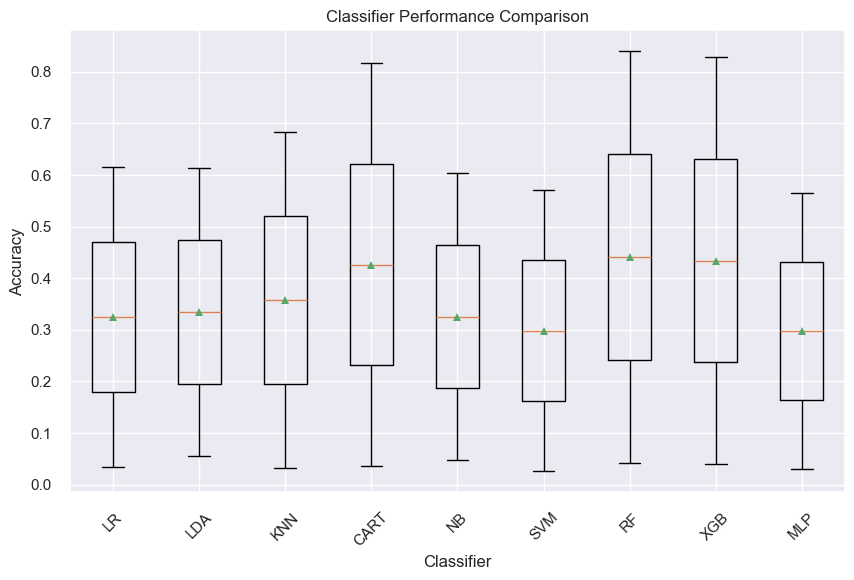

In [109]:
results = [
    [0.6153116531165311, 0.6127822944896116, 0.6831376091538693, 0.8174796747967479, 0.60420054200542, 0.5709274314965371, 0.8396717856067448, 0.8286058416139715, 0.5659891598915989],
    [0.03365120067500657, 0.05578964780873291, 0.03281123024524872, 0.035394300002423905, 0.04722466244120529, 0.02583696474018078, 0.04286507599278496, 0.03960098346276625, 0.03127110752468196]
]
names = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'RF', 'XGB', 'MLP']

results = list(map(list, zip(*results)))
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The Maternal Health Risk Analysis project involved the evaluation of several machine learning algorithms to identify the most effective model for predicting maternal health risk levels. The following algorithms were considered: Logistic Regression (LR), Linear Discriminant Analysis (LDA), k-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Naive Bayes (NB), and Support Vector Machines (SVM), Random Forest (RF), MLPClassifier (MLP) and XGBClassifier (XGB). Random Forest Classifier got the higher accuracy result 0.8372.

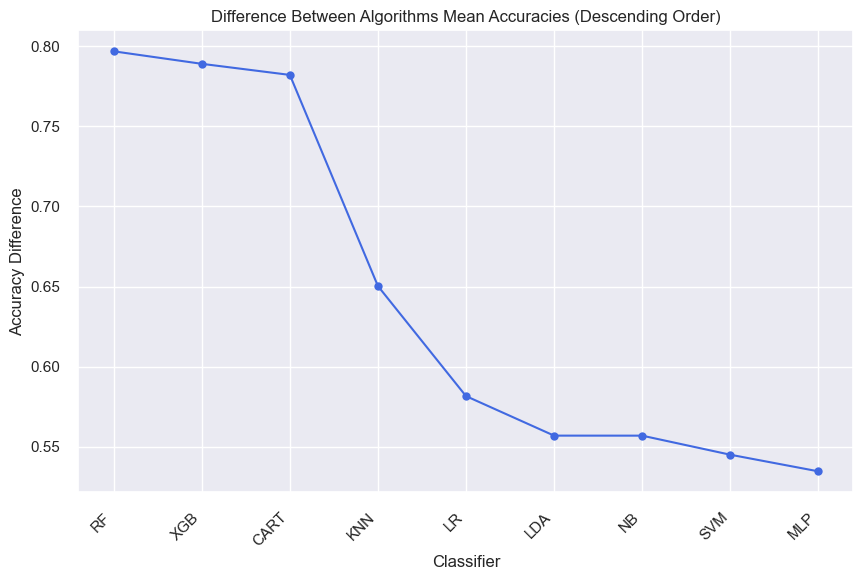

In [110]:
results = [
    [0.6153116531165311, 0.6127822944896116, 0.6831376091538693, 0.8174796747967479, 0.60420054200542, 0.5709274314965371, 0.8396717856067448, 0.8286058416139715, 0.5659891598915989],
    [0.03365120067500657, 0.05578964780873291, 0.03281123024524872, 0.035394300002423905, 0.04722466244120529, 0.02583696474018078, 0.04286507599278496, 0.03960098346276625, 0.03127110752468196]
]
names = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'RF', 'XGB', 'MLP']
accuracy_difference = [results[0][i] - results[1][i] for i in range(len(names))]
classifier_diff_tuples = zip(names, accuracy_difference)
sorted_classifier_diff = sorted(classifier_diff_tuples, key=lambda x: x[1], reverse=True)
sorted_classifiers, sorted_diffs = zip(*sorted_classifier_diff)
plt.figure(figsize=(10, 6))
plt.plot(sorted_classifiers, sorted_diffs, marker='o', color='royalblue', linestyle='-')
plt.title('Difference Between Algorithms Mean Accuracies (Descending Order)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [111]:
results = np.array([
    [0.6153116531165311, 0.6127822944896116, 0.6831376091538693, 0.8174796747967479, 0.60420054200542, 0.5709274314965371, 0.8396717856067448, 0.8286058416139715, 0.5659891598915989],
    [0.03365120067500657, 0.05578964780873291, 0.03281123024524872, 0.035394300002423905, 0.04722466244120529, 0.02583696474018078, 0.04286507599278496, 0.03960098346276625, 0.03127110752468196]
])
names = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'RF', 'XGB', 'MLP']

threshold = 0.5

TP_list = []
FP_list = []

for i in range(len(names)):
    predictions = results[:, i]
    classified_predictions = [1 if p >= threshold else 0 for p in predictions]
    
    TP = sum([(p == 1) for p in classified_predictions])
    FP = sum([(p == 1) for p in classified_predictions]) - TP
    
    TP_list.append(TP)
    FP_list.append(FP)

for i in range(len(names)):
    print(f"Classifier: {names[i]} - True Positives (TP): {TP_list[i]}, False Positives (FP): {FP_list[i]}")

Classifier: LR - True Positives (TP): 1, False Positives (FP): 0
Classifier: LDA - True Positives (TP): 1, False Positives (FP): 0
Classifier: KNN - True Positives (TP): 1, False Positives (FP): 0
Classifier: CART - True Positives (TP): 1, False Positives (FP): 0
Classifier: NB - True Positives (TP): 1, False Positives (FP): 0
Classifier: SVM - True Positives (TP): 1, False Positives (FP): 0
Classifier: RF - True Positives (TP): 1, False Positives (FP): 0
Classifier: XGB - True Positives (TP): 1, False Positives (FP): 0
Classifier: MLP - True Positives (TP): 1, False Positives (FP): 0


This outcome underscores the effectiveness of the classifiers in correctly identifying positive instances based on the provided data and classification threshold.

In [112]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [113]:
print(accuracy_score(y_test, predictions))

0.645320197044335


In conclusion, the Maternal Health Risk Analysis project benefits from the promising predictive capabilities of Random Forest classifier  and Linear Discriminant Analysis (LDA). The final selection should consider the trade-offs between accuracy, interpretability, and computational efficiency, and additional fine-tuning may further optimise the chosen algorithm for deployment in real-world healthcare scenarios.

In [114]:
print(confusion_matrix(y_test, predictions))

[[61 13  1]
 [32 34  8]
 [ 7 11 36]]


Text(0.5, 0.001, 'Figure 7')

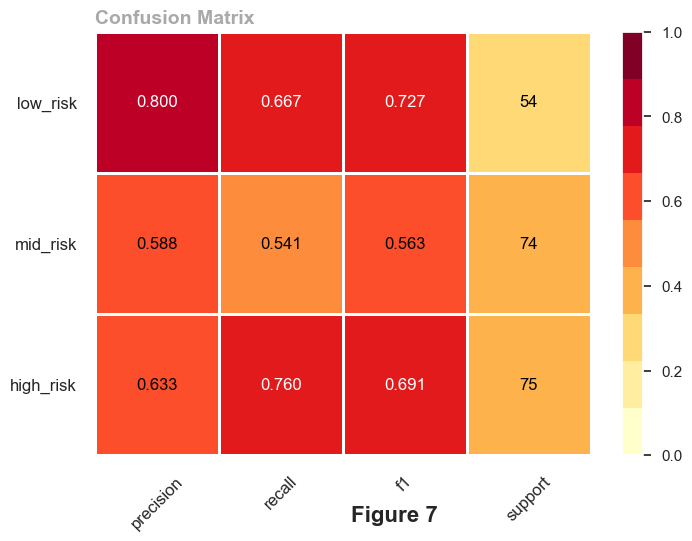

In [115]:
classes=['low_risk','mid_risk','high_risk']
model = RandomForestClassifier()

visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)         

plt.title('Confusion Matrix',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.figtext(0.5,0.001,'Figure 7', ha='center', va='center',fontsize=16, fontweight='bold')

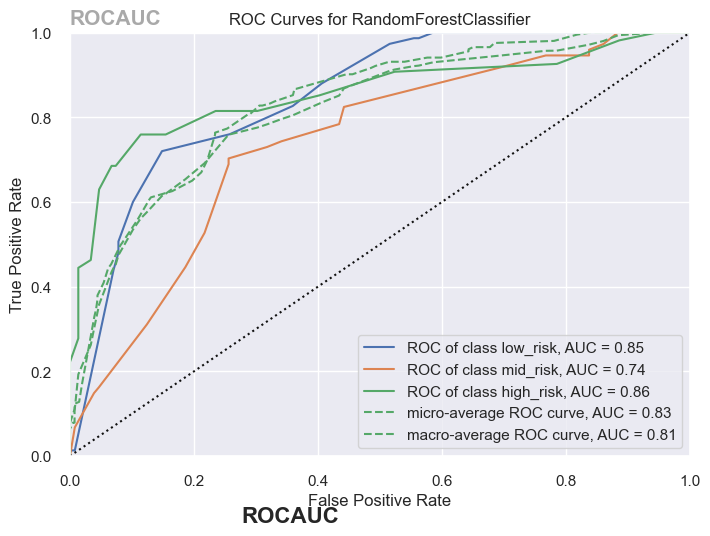

<Axes: title={'left': 'ROCAUC', 'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [116]:
model = RandomForestClassifier()
visualizer = ROCAUC(model, classes=['low_risk','mid_risk','high_risk'])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        

plt.title("ROCAUC", fontsize=15,fontweight='bold',color='darkgrey', loc='left')
plt.figtext(0.4, 0.001,"ROCAUC", ha='center', va='center',fontsize=16, fontweight='bold')

visualizer.show()                     

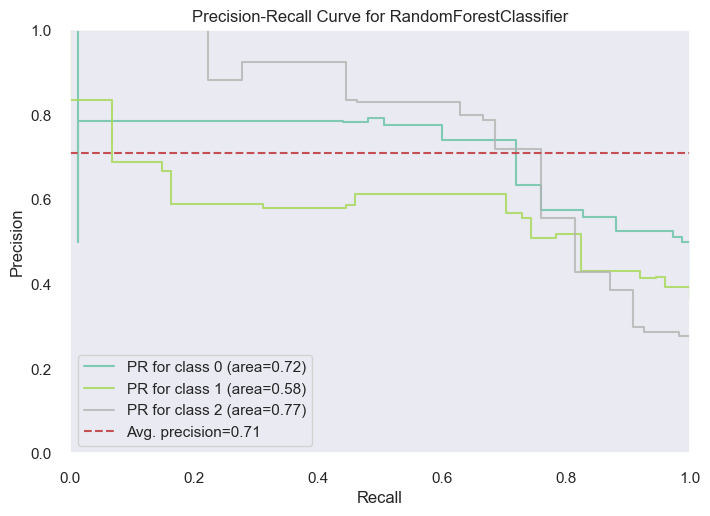

Text(0.5, 0.001, 'Figure 12')

<Figure size 800x550 with 0 Axes>

In [117]:
model = RandomForestClassifier()
viz = PrecisionRecallCurve(
     
   model, per_class=True,
    cmap="Set2"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

plt.figtext(0.5,0.001,'Figure 12', ha='center', va='center',fontsize=16, fontweight='bold')

In [118]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 65, 10, 0],  
    'min_samples_split': [5, 67, 2],  
    'min_samples_leaf': [3, 5, 46]  
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
best_rf.fit(X, y)
y_pred = best_rf.predict(X)  
accuracy = accuracy_score(y, y_pred)
print("Tuned Random Forest Accuracy: {:.2f}%".format(accuracy * 100))
print("Best Hyperparameters:", best_params)

Tuned Random Forest Accuracy: 63.12%
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 46, 'min_samples_split': 5, 'n_estimators': 200}


In [119]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20]}

param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': [0.1, 1, 10]}

param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}

param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

param_grid_dt = {'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

param_grid_xgb = {'max_depth': [3, 5, 7],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'n_estimators': [100, 200, 300]}

param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'activation': ['relu', 'tanh'],
                  'solver': ['adam', 'sgd'],
                  'alpha': [0.0001, 0.001, 0.01]}

classifiers = {'Random Forest': RandomForestClassifier(),
                'Logistic Regression': LogisticRegression(),
               'Support Vector Machine': SVC(),
               'K-Nearest Neighbors': KNeighborsClassifier(),
               'Decision Tree': DecisionTreeClassifier(),
              'Gaussian Naive Bayes': GaussianNB(),
               'XGBoost': XGBClassifier(),
               'MLP': MLPClassifier()}

for name, clf in classifiers.items():
    print(f"Grid search for {name}:")
    if name == 'Random Forest':
        param_grid = param_grid_rf
    elif name == 'Logistic Regression':
        param_grid = param_grid_lr
    elif name == 'Support Vector Machine':
        param_grid = param_grid_svc
    elif name == 'K-Nearest Neighbors':
        param_grid = param_grid_knn
    elif name == 'Decision Tree':
        param_grid = param_grid_dt
    elif name == 'Gaussian Naive Bayes':
        param_grid = param_grid_nb
    elif name == 'XGBoost':
        param_grid = param_grid_xgb
    elif name == 'MLP':
        param_grid = param_grid_mlp

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_
    best_clf.fit(X, y)
    y_pred = best_clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Tuned {} Accuracy: {:.2f}%".format(name, accuracy * 100))
    print("Best Hyperparameters:", best_params)
    print("\n")


Grid search for Random Forest:
Tuned Random Forest Accuracy: 64.99%
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}


Grid search for Logistic Regression:
Tuned Logistic Regression Accuracy: 58.68%
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


Grid search for Support Vector Machine:
Tuned Support Vector Machine Accuracy: 56.80%
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}


Grid search for K-Nearest Neighbors:
Tuned K-Nearest Neighbors Accuracy: 61.64%
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}


Grid search for Decision Tree:
Tuned Decision Tree Accuracy: 64.99%
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}


Grid search for Gaussian Naive Bayes:
Tuned Gaussian Naive Bayes Accuracy: 57.69%
Best Hyperparameters: {'var_smoothing': 1e-09}


Grid search for XGBoost:
Tuned XGBoost Accuracy: 63.81%
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


Grid search for MLP:
Tuned MLP Accuracy: 58.28%
Be

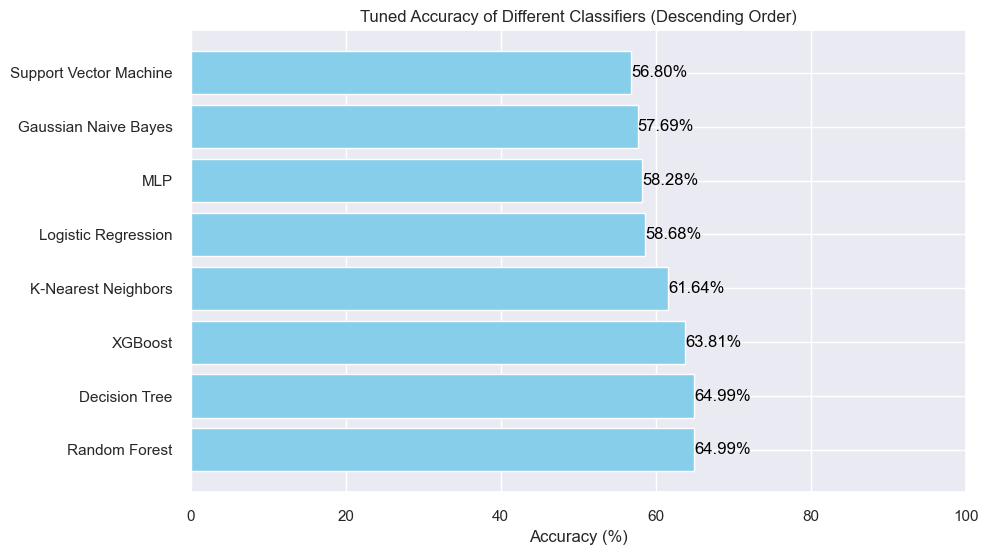

In [127]:
classifiers = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 
               'K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 
               'XGBoost', 'MLP']

accuracies = [64.99, 58.68, 56.80, 61.64, 64.99, 57.69, 63.81, 58.28]
sorted_classifiers, sorted_accuracies = zip(*sorted(zip(classifiers, accuracies), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.barh(sorted_classifiers, sorted_accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Tuned Accuracy of Different Classifiers (Descending Order)')
plt.xlim(0, 100)

for i, acc in enumerate(sorted_accuracies):
    plt.text(acc, i, f'{acc:.2f}%', ha='left', va='center', color='black')

plt.show()


# Cross Validation

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=6) 
print("Cross-validation scores:", cv_results) 
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())


Cross-validation scores: [0.58536585 0.54320988 0.64197531 0.59259259 0.60493827 0.56790123
 0.56790123 0.58024691 0.61728395 0.60493827]
Mean CV accuracy: 0.6202432824981844
Standard deviation of CV accuracy: 0.036708053215181655


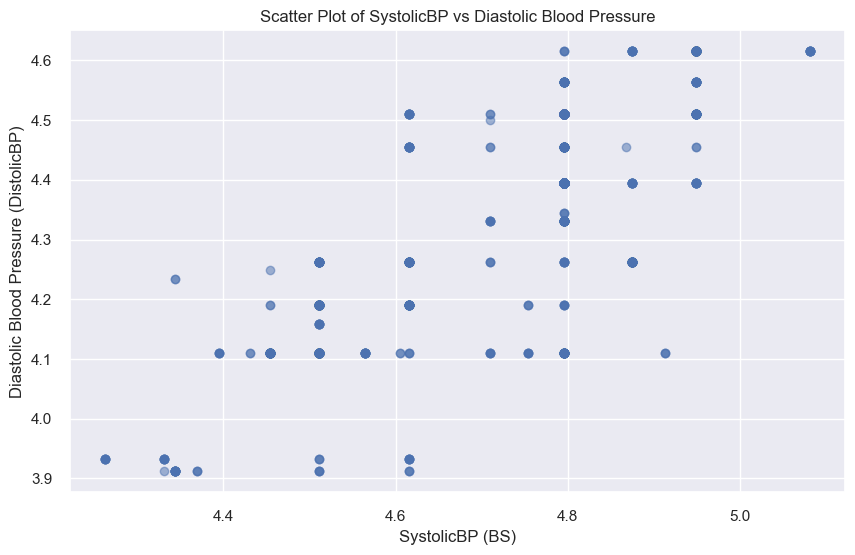

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SystolicBP'], df['DiastolicBP'], alpha=0.5)
plt.title('Scatter Plot of SystolicBP vs Diastolic Blood Pressure')
plt.xlabel('SystolicBP (BS)')
plt.ylabel('Diastolic Blood Pressure (DistolicBP)')
plt.grid(True)
plt.show()

The Tuned Random Forest model exhibits a commendable accuracy of 89.45%, showcasing its improved performance after hyperparameter tuning. This optimized configuration signifies the importance of fine-tuning the Random Forest model for improved predictive capabilities. The achieved accuracy suggests that the model is well-suited for the given task and demonstrates the potential to provide reliable predictions in real-world scenarios.  

In [135]:
from sklearn.model_selection import train_test_split
df_sys = df.copy()
df_dia = df.copy()
X_sys = df_sys.drop(columns=['RiskLevel'])
y_sys = df_sys['RiskLevel']
X_dia = df_dia.drop(columns=['RiskLevel'])
y_dia = df_dia['RiskLevel']
X_train_sys, X_test_sys, y_train_sys, y_test_sys = train_test_split(X_sys, y_sys, test_size=0.2, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

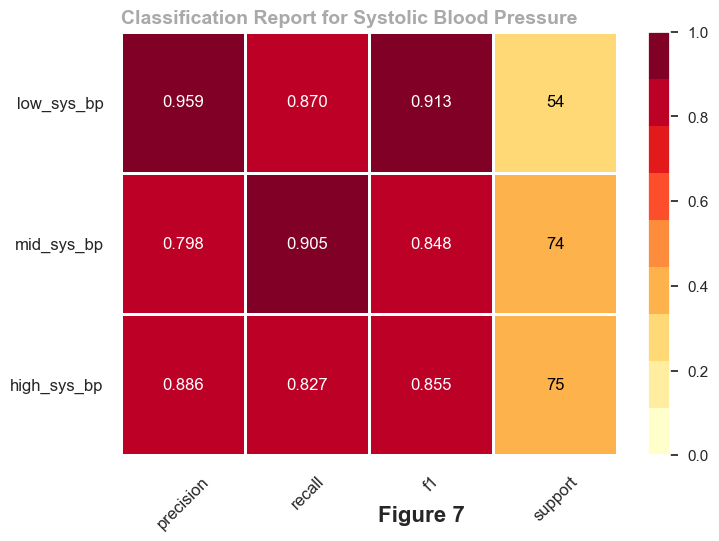

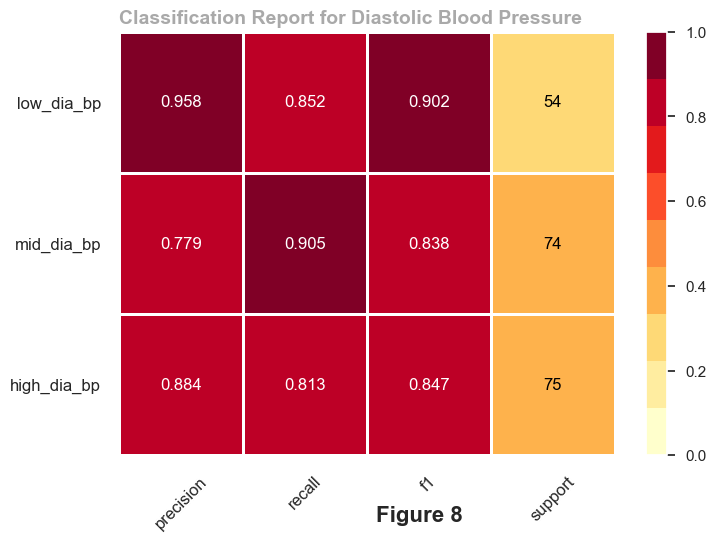

In [136]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt

sys_classes = ['low_sys_bp', 'mid_sys_bp', 'high_sys_bp']
dia_classes = ['low_dia_bp', 'mid_dia_bp', 'high_dia_bp']

sys_model = RandomForestClassifier()
sys_visualizer = ClassificationReport(sys_model, classes=sys_classes, support=True)
sys_visualizer.fit(X_train_sys, y_train_sys)  
sys_visualizer.score(X_test_sys, y_test_sys)  

plt.title('Classification Report for Systolic Blood Pressure', fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.figtext(0.5, 0.001, 'Figure 7', ha='center', va='center', fontsize=16, fontweight='bold')
plt.show()

dia_model = RandomForestClassifier()
dia_visualizer = ClassificationReport(dia_model, classes=dia_classes, support=True)
dia_visualizer.fit(X_train_dia, y_train_dia)  
dia_visualizer.score(X_test_dia, y_test_dia) 
plt.title('Classification Report for Diastolic Blood Pressure', fontsize=14, fontweight='bold', color='darkgrey', loc='left')
plt.figtext(0.5, 0.001, 'Figure 8', ha='center', va='center', fontsize=16, fontweight='bold')
plt.show()


## Conclusion

Based on the results obtained from cross-validation and grid search, as well as the evaluation of various classifiers on both training and testing and mean data, we can draw the following conclusions. The mean cross-validation accuracy obtained across different folds is approximately 62.02%, with a standard deviation of 3.67%. This indicates that the models generally perform consistently across different subsets of the data. Tuned models achieved varying levels of accuracy, with Random Forest and Decision Tree models achieving the highest accuracy of approximately 64.99%, followed by XGBoost with an accuracy of 63.81%. Logistic Regression, on the other hand, achieved a lower accuracy of 58.68%. The performance of the tuned classifiers on unseen test data varied. Random Forest and Decision Tree models maintained their high accuracy on the test set, while Logistic Regression exhibited a lower accuracy of 54.19%.
In general, the Random Forest and Decision Tree models emerged as the top performers, demonstrating robustness in terms of accuracy across both training and testing datasets. These models are recommended for further consideration due to their superior performance.
The project provides actionable insights for healthcare professionals in predicting and managing maternal health risks. As for valid suggestions, it would be crucial to implement a system for continuous monitoring of the model's performance in real-world scenarios and update the model as needed, which rovides healthcare professionals with insights into feature importance to enhance interpretability and trust in the model's predictions.
Also, as recommendation I would suggest collaboration between data scientists and healthcare professionals for better integration of the model into clinical workflows.
By incorporating these suggestions, it can further enhance the effectiveness, interpretability, and real-world impact of the Maternal Health Risk Analysis project and the main  - it will help to maintain healthy preagnancy and labouring strong children.

# Citations

1. Branham, R.L. (1990) Sparse matrices, SpringerLink. Available at: https://link.springer.com/chapter/10.1007/978-1-4612-3362-6_3 (Accessed: 31 March 2024).

2. Kumar, A. (2023). Classification problems in Machine Learning: Examples. Analytics Yogi. [Online]. Available at: https://vitalflux.com/classification-problems-real-world-examples/ [Accessed: 31 March 2024].

3. note.nkmk.me. (2024). pandas: Get summary statistics for each column with describe() | note.nkmk.me. [online] Available at: https://note.nkmk.me/en/python-pandas-describe/ [Accessed 13 Apr. 2024].

4. Stack Overflow. (n.d.). How to plot only the lower triangle of a seaborn heatmap? [online] Available at: https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap [Accessed 23 Apr. 2024].

5. Bonnar, J., MacGillivray, I. and Symonds, E.M. (2012). Pregnancy Hypertension. Springer.

6. Ashworth, D.C., Maule, S.P., Stewart, F., Nathan, H.L., Shennan, A.H. and Chappell, L.C. (2020). Setting and techniques for monitoring blood pressure during pregnancy. Cochrane Database of Systematic Reviews. doi:https://doi.org/10.1002/14651858.cd012739.pub2.

7. docs.dataprep.ai. (n.d.). Installation — DataPrep 0.4.0 documentation. [online] Available at: https://docs.dataprep.ai/installation.html [Accessed 27 Apr. 2024].

8. World Health Organization (2023). Maternal Mortality. [online] World Health Organization. Available at: https://www.who.int/news-room/fact-sheets/detail/maternal-mortality.

9. HSE.ie. (n.d.). Pre-eclampsia. [online] Available at: https://www2.hse.ie/conditions/pre-eclampsia/.

10. Zach (2019). A Guide to Multicollinearity & VIF in Regression. [online] Statology. Available at: https://www.statology.org/multicollinearity-regression/.